## Market Dynamics Analysis: Correlations and CAPM Betas of the S&P 500 During Financial Crises

In [1]:
import pandas as pd
import yfinance as yf

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tickers = pd.read_html(io=url)[0]['Symbol'].to_list()

tickers = [t.replace('.', '-') for t in tickers]
tickers[:5]

def get_data(tickers, index, start, end, file):
    (
        yf.download(tickers=tickers, start=start, end=end)
        ['Adj Close']
        .pct_change()
        .join(
            other=(
                
                yf.download(tickers=index, start='1900-01-01', end=end)
                [['Close']]
                .rename(columns={'Close': index})
            ),
            how='outer'
        )
        .to_csv(file)
    )

get_data(tickers=tickers, index='^GSPC', start='1980-01-01', end='2023-12-31', file='sp500.csv')

sp500 = (
    pd.read_csv(
        filepath_or_buffer='sp500.csv',
        parse_dates=['Date'],
        index_col=['Date']
    )
    .rename_axis(columns='Ticker')
)

sp500.iloc[-5:, -5:].pipe(display)

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['SOLV', 'GEV']: Exception("%ticker%: Data doesn't exist for startDate = 315550800, endDate = 1703998800")
[*********************100%%**********************]  1 of 1 completed


Ticker           YUM       ZBH      ZBRA       ZTS        ^GSPC
Date                                                           
2023-12-22  0.000154  0.007605  0.015454  0.001644  4754.629883
2023-12-26  0.002000  0.009142  0.022605  0.002667  4774.750000
2023-12-27  0.004453 -0.002388  0.001053  0.007161  4781.580078
2023-12-28 -0.002446  0.004128 -0.001595  0.001320  4783.350098
2023-12-29  0.001073  0.000576 -0.007336  0.001065  4769.830078

We have identified the significant turning points in the S&P 500 index, categorizing them as either "peaks" or "troughs." This classification is pivotal for defining periods of financial crises, with peaks leading into bear markets (a 20% decline from recent highs) and troughs marking the transition into bull markets (a 20% increase from recent lows). This methodology aligns with conventional financial analysis, where the magnitude of market movements is used to demarcate phases of market optimism (bull markets) and pessimism (bear markets). 

Specifically, these markers serve multiple purposes:

Benchmarking Crisis Periods: By defining the start and end points of financial crises, subsequent analyses can focus on these intervals to study market behavior under stress.
Comparative Analysis: With the peaks and troughs established, it becomes possible to compare market behavior during downturns and recoveries, offering insights into how different phases of market cycles influence stock correlations and CAPM betas.
Historical Context: The identification of these points provides a historical context, enabling an analysis of how market responses to crises have evolved over time.

## Historical Context of S&P 500 Milestones
The S&P 500 index, a barometer of the U.S. equities market and the broader economy, has experienced several notable milestones and significant fluctuations since its inception in 1957. Understanding these fluctuations offers critical insights into market dynamics and helps in interpreting the peaks and troughs identified in our data analysis.

Milestone Highs: The journey of the S&P 500 reaching milestone highs began on February 2, 1998, when it first closed above 1,000 points. Subsequent peaks reflect periods of economic growth and investor optimism, with landmarks reached during the dot-com bubble (March 24, 2000, intraday high of 1552.87), just before the 2007-2008 financial crisis (October 9, 2007, close of 1565.15), the post-crisis bull market (February 19, 2020, close of 3386.15), and during the COVID-19 pandemic (August 18, 2020, close of 3389.78). The most recent historical high as of the provided data is on February 9, 2024, with the index closing at 5026.61, marking the S&P 500 surpassing 5,000 points.

Milestone Lows: The lows of the S&P 500 are just as telling as the highs. The closing low during the financial crisis on March 9, 2009, at 676.53, reflects the depths of the market downturn.

Milestone Changes: The index has also seen dramatic shifts within short periods, signaling market volatility and the impact of economic events. Notably, October 19, 1987, saw the index's largest daily percentage loss, falling 20.47 percent on "Black Monday." The year 2008 was particularly turbulent, ending with the S&P 500 down 38.49 percent, its worst yearly percentage loss. The onset of the COVID-19 pandemic saw the index drop 9.5 percent on March 16, 2020, marking the start of a bear market.

Emergence from Crisis: The market's resilience is highlighted by its recovery patterns, such as on June 8, 2023, when the S&P 500 closed at 4293.93, a 20% increase from the bear market low on October 12, 2022, signaling the end of that bear market.

In [2]:
import pandas as pd


gspc_close = sp500['^GSPC']

peaks = []
troughs = []
is_seeking_trough = False
peak_price = gspc_close.iloc[0]
trough_price = peak_price

for date, price in gspc_close.items():
    if not is_seeking_trough:
        
        if price > peak_price:
            peak_price = price
            peak_date = date
        elif price <= peak_price * 0.8:
            
            peaks.append((peak_date, peak_price))
            is_seeking_trough = True
            trough_price = price
            trough_date = date
    else:
        
        if price < trough_price:
            trough_price = price
            trough_date = date
        elif price >= trough_price * 1.2:
            
            troughs.append((trough_date, trough_price))
            is_seeking_trough = False
            peak_price = price
            peak_date = date

peaks_df = pd.DataFrame(peaks, columns=['Peak Date', 'Peak Price'])
troughs_df = pd.DataFrame(troughs, columns=['Trough Date', 'Trough Price'])


print("Peaks:\n", peaks_df)
print("\nTroughs:\n", troughs_df)


Peaks:
     Peak Date   Peak Price
0  1929-09-16    31.860001
1  1930-04-10    25.920000
2  1931-02-24    18.170000
3  1931-06-26    15.350000
4  1931-11-09    11.520000
5  1932-09-07     9.310000
6  1933-07-18    12.200000
7  1934-02-06    11.820000
8  1937-03-10    18.670000
9  1938-10-10    13.910000
10 1939-10-25    13.210000
11 1940-11-07    11.390000
12 1946-05-29    19.250000
13 1948-06-15    17.059999
14 1956-08-02    49.639999
15 1961-12-12    72.639999
16 1966-02-09    94.059998
17 1968-11-29   108.370003
18 1973-01-11   120.239998
19 1980-11-28   140.520004
20 1987-08-25   336.769989
21 2000-03-24  1527.459961
22 2002-01-04  1172.510010
23 2007-10-09  1565.150024
24 2009-01-06   934.700012
25 2020-02-19  3386.149902
26 2022-01-03  4796.560059

Troughs:
    Trough Date  Trough Price
0   1929-11-13     17.660000
1   1930-12-16     14.440000
2   1931-06-02     12.200000
3   1931-10-05      8.820000
4   1932-06-01      4.400000
5   1933-02-27      5.530000
6   1933-10-19      8.

These tables offer a distilled view of market cycles and are indicative of key moments in the historical timeline of the S&P 500 where significant reversals in market sentiment occurred.

The dot-com bubble peak on March 10, 2000, marked a historic high before a technology-driven market collapse. The tragic events of September 11, 2001, brought sharp global market declines due to the substantial economic impact and uncertainty they caused.

In 2002, stock prices experienced a downturn, sliding from earlier recoveries post-9/11 and reaching lows not seen since 1997-1998. The Chinese stock bubble of 2007 precipitated a significant drop in worldwide stock markets when the SSE Composite Index fell by 9%, and the 2007–2009 period marked one of the most severe U.S. bear markets since the Great Depression, with over a 50% decline in major indices.

The financial crisis of 2007–2008, prompted by the failures of large financial institutions and the subsequent global impact, resulted in drastic reductions in equity and commodity values worldwide. 2010 saw the Flash Crash, a sudden intraday market fall, and in August 2011, the S&P 500 briefly entered a bear market, ending the year flat despite the fluctuations.

The years 2015-2016 brought about another Chinese stock market crash and a global market selloff, and 2018 marked a steep decline in the S&P 500, highlighting vulnerabilities in the global financial system. The 2020 stock market crash, driven by the COVID-19 pandemic, caused a 34% decline from February to March, reflecting the deep uncertainty and the immediate economic impact of the pandemic lockdowns. The year 2022 experienced another significant decline, with a 27.55% drop by October, affected by various factors including the DJIA and Nasdaq Composite indices' falls.

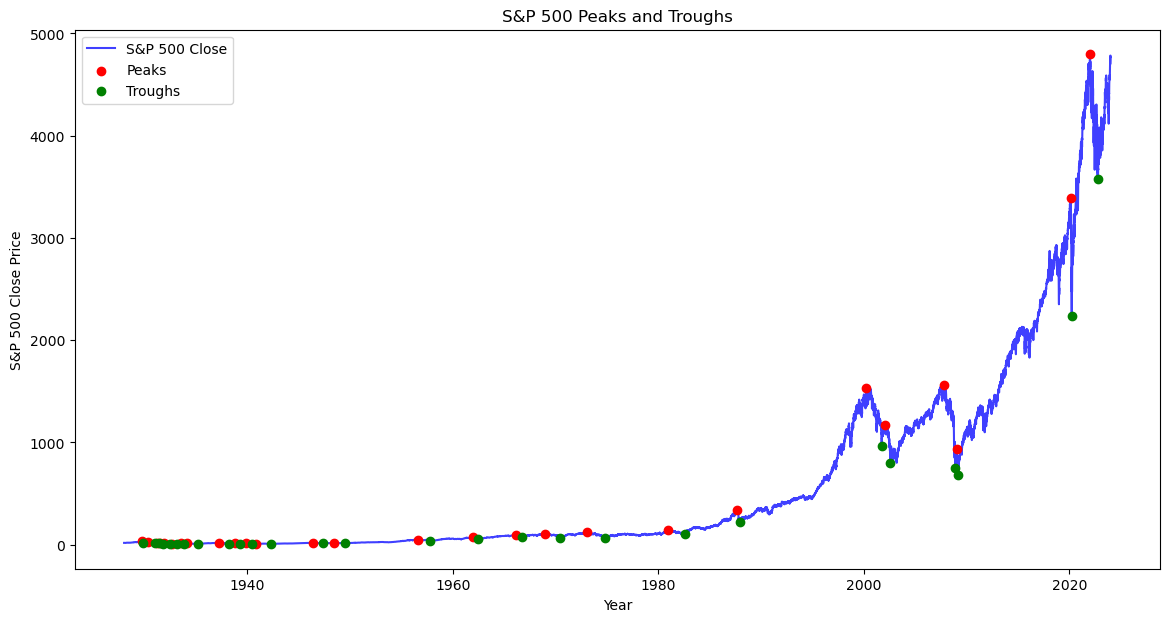

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
peaks_df = pd.DataFrame(peaks, columns=['Date', 'Price']).set_index('Date')
troughs_df = pd.DataFrame(troughs, columns=['Date', 'Price']).set_index('Date')

plt.figure(figsize=(14, 7))
plt.plot(gspc_close.index, gspc_close.values, label='S&P 500 Close', color='blue', alpha=0.75)

plt.scatter(peaks_df.index, peaks_df.Price, color='red', label='Peaks', zorder=5)

plt.scatter(troughs_df.index, troughs_df.Price, color='green', label='Troughs', zorder=5)

plt.title('S&P 500 Peaks and Troughs')
plt.xlabel('Year')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.show()


S&P 500 Close Plot: The line graph represents the S&P 500 index closing prices, marked in blue, showing the overall trend of the stock market from 1980 onwards. The use of an alpha transparency makes the line slightly see-through, which helps in highlighting the overlaid points without obscuring the underlying trend.

Peaks and Troughs Scatter Plot: The peaks are highlighted with red points, while the troughs are marked in green. This distinction is visually clear and immediately draws attention to the key moments of market highs and lows.
The peaks correspond with periods of economic optimism or bubbles, while the troughs align with recessions or market corrections.

To complement the insights from this plot, we can look at key moments in the S&P 500's history that might align with these peaks and troughs:

Significant highs could correspond with periods like the tech bubble in the late 1990s and the housing boom in the mid-2000s.
Significant lows could relate to the early 2000s recession following the dot-com bubble burst, the 2008 financial crisis, and the market volatility during the early stages of the COVID-19 pandemic in 2020.

The high in 2000 aligns with the dot-com bubble, while the subsequent low in the early 2000s corresponds with the bubble's burst. Similarly, the peak in 2007 predates the global financial crisis, with the trough in 2009 marking the market's bottom during this period. Most recently, the significant drop in early 2020 reflects the market's response to the COVID-19 pandemic.

The S&P 500 index's returns in 2023, which saw a rally over 24%, were largely driven by the performance of mega-cap stocks, notably referred to as the "Magnificent Seven" which includes Amazon, Apple, Nvidia, Tesla, Microsoft, Meta, and Alphabet. These companies significantly influenced the index's performance, and the market returns for that year were exceptionally strong compared to historical standards. However, a vast majority of stocks, about 72%, underperformed the index in that year.

In terms of forecasting, while predictions for 2023 were largely off, with most firms being too cautious, Goldman Sachs notably expected the economy to avoid a recession, a prediction that held true. For 2024, Goldman Sachs has predicted more moderate returns for the S&P 500, estimating a rise of 7%, with a general consensus among analysts suggesting returns in the 5-10% range, indicating a cautiously optimistic outlook for the year.

In [4]:
import pandas as pd

sp500 = sp500['1980-01-01':'2023-12-31']

gspc_close = sp500['^GSPC']

peak = gspc_close.iloc[0]
is_in_crisis = False
crisis_start_date = gspc_close.index[0]
crisis_periods = []

for date, price in gspc_close.items():
    if not is_in_crisis:
        peak = max(peak, price)
    current_drawdown = (price - peak) / peak
    if current_drawdown <= -0.20 and not is_in_crisis:
        is_in_crisis = True
        crisis_start_date = date
        trough = price
    if is_in_crisis:
        trough = min(trough, price)
    if is_in_crisis and ((price - trough) / trough) >= 0.20:
        crisis_periods.append((crisis_start_date, date))
        is_in_crisis = False
        peak = price
        trough = price

efficient_crisis_periods_df = pd.DataFrame(crisis_periods, columns=['Crisis Start', 'Crisis End'])

efficient_crisis_periods_df

Crisis Start Crisis End
0   1982-02-22 1982-09-14
1   1987-10-19 1988-03-08
2   2001-03-12 2001-12-05
3   2002-07-10 2002-08-22
4   2008-07-09 2008-12-08
5   2009-02-23 2009-03-23
6   2020-03-12 2020-04-08
7   2022-06-13 2023-06-08

In [5]:
peak = sp500['^GSPC'].iloc[0]
is_in_bear_market = False
bear_market_periods = []
bull_market_periods = []


last_bear_market_end = None

for date, price in sp500['^GSPC'].items():
    if not is_in_bear_market:
        
        peak = max(peak, price)
    
    current_decline = (price - peak) / peak
    if current_decline <= -0.20 and not is_in_bear_market:
        
        is_in_bear_market = True
        bear_market_start = date
        trough = price
    elif is_in_bear_market:
        
        trough = min(trough, price)
        current_recovery = (price - trough) / trough
        if current_recovery >= 0.20:
            
            bear_market_periods.append((bear_market_start, date))
            is_in_bear_market = False
            peak = price
            trough = price
            
            last_bear_market_end = date
    elif last_bear_market_end and date > last_bear_market_end:
        
        if not bull_market_periods or bull_market_periods[-1][1] < last_bear_market_end:
            bull_market_periods.append((last_bear_market_end, date))
        else:
            
            bull_market_periods[-1] = (bull_market_periods[-1][0], date)


bear_market_df = pd.DataFrame(bear_market_periods, columns=['Bear Market Start', 'Bear Market End'])
bull_market_df = pd.DataFrame(bull_market_periods, columns=['Bull Market Start', 'Bull Market End'])

bear_market_df, bull_market_df

(  Bear Market Start Bear Market End
 0        1982-02-22      1982-09-14
 1        1987-10-19      1988-03-08
 2        2001-03-12      2001-12-05
 3        2002-07-10      2002-08-22
 4        2008-07-09      2008-12-08
 5        2009-02-23      2009-03-23
 6        2020-03-12      2020-04-08
 7        2022-06-13      2023-06-08,
   Bull Market Start Bull Market End
 0        1982-09-14      1987-10-16
 1        1988-03-08      2001-03-09
 2        2001-12-05      2002-07-09
 3        2002-08-22      2008-07-08
 4        2008-12-08      2009-02-20
 5        2009-03-23      2020-03-11
 6        2020-04-08      2022-06-10
 7        2023-06-08      2023-12-29)

The code defines a bear market as a period where the index drops by 20% or more from its peak. The detection of a bear market triggers the storage of the start date and continues until a recovery of 20% from the trough is observed, which then marks the end date of the bear market. 
A bull market is often characterized by rising investor confidence, economic recovery, and generally positive market sentiment leading to a sustained increase in stock prices.
A bull market period continues until another bear market is identified, indicating a cyclical nature of financial markets where periods of economic expansion are followed by contraction.
The tracking of bull markets is crucial as they represent periods of opportunity and growth for investors. Notably, bull markets can last for years and include significant wealth creation phases, reflecting broader economic prosperity.

From an investor’s perspective, the analysis of these periods can inform investment strategies, particularly the timing of market entry and exit.
The ability to distinguish between bull and bear markets is also a valuable tool for managing risk and for setting expectations regarding market volatility.

Bull markets have been observed following significant downturns, such as after the 2008 financial crisis when the index recovered and continued to reach new heights for several years. Similarly, after the sharp decline in the market due to the COVID-19 pandemic in 2020, a new bull market began, highlighted by a swift recovery and subsequent growth to new record highs.

We took a sophisticated approach to tracking the ebbs and flows of the stock market, specifically identifying the start and end points of bear and bull markets. By defining a bear market as a decline of 20% from a peak, and a bull market as a rise of 20% from a trough, the code effectively categorizes the market cycles that have historically demonstrated the natural oscillations between market optimism and pessimism.

From the 1950s until recent years, the S&P 500 has shown a propensity to rise in the 12 months following the onset of a new bull market, with an average one-year return of 19%. However, it's also noteworthy that after a 20% rise from market lows, which signifies the start of a bull market, the S&P 500 has, on average, experienced negative returns in the very immediate term (the first week and month) before continuing its upward trajectory.

The historical patterns suggest that while markets may face initial challenges in maintaining upward momentum, bull markets tend to be resilient over the long term. The current market conditions, as of mid-2023, reflect this resilience with the S&P 500 rallying more than 20% from its previous lows despite an aggressive rate hike campaign by the Federal Reserve and ongoing economic concerns. Such conditions have once again rekindled the bull market, underscoring the market's ability to overcome short-term turbulence in pursuit of longer-term growth.

Looking at the historical trends, reveals how these market cycles have played out over decades. It's important to remember, however, that past performance is not indicative of future results, and every cycle can present unique circumstances driven by contemporary economic conditions, investor sentiment, and global events.

In [6]:
import pandas as pd
crisis_periods = pd.DataFrame({
    'Crisis Start': ['1982-02-22','1987-10-19', '2001-03-12','2002-07-10', '2008-07-09','2009-02-23', '2020-03-12', '2022-06-13'],
    'Crisis End': ['1982-09-14','1988-03-08', '2001-12-05','2002-08-22','2008-12-08','2009-03-23', '2020-04-08', '2023-06-08']
})

crisis_periods['Crisis Start'] = pd.to_datetime(crisis_periods['Crisis Start'])
crisis_periods['Crisis End'] = pd.to_datetime(crisis_periods['Crisis End'])

all_correlations_crisis = {}
all_correlations_non_crisis = {}
betas_crisis_all = {}
betas_non_crisis_all = {}

def calculate_capm_betas(stock_returns, market_returns):
    market_variance = market_returns.var()
    betas = {}
    for stock in stock_returns.columns:
        covariance = stock_returns[stock].cov(market_returns)
        betas[stock] = covariance / market_variance
    return betas

for index, row in crisis_periods.iterrows():
    crisis_start, crisis_end = row['Crisis Start'], row['Crisis End']
    
    non_crisis_start = crisis_start - pd.DateOffset(years=1)
    non_crisis_end = crisis_start - pd.DateOffset(days=1)
    
    crisis_returns = sp500.loc[crisis_start:crisis_end].drop('^GSPC', axis=1)
    non_crisis_returns = sp500.loc[non_crisis_start:non_crisis_end].drop('^GSPC', axis=1)
    market_returns_crisis = sp500.loc[crisis_start:crisis_end, '^GSPC']
    market_returns_non_crisis = sp500.loc[non_crisis_start:non_crisis_end, '^GSPC']
    
    correlation_crisis = crisis_returns.corr()
    correlation_non_crisis = non_crisis_returns.corr()
    all_correlations_crisis[f"Crisis {index+1}"] = correlation_crisis
    all_correlations_non_crisis[f"Non-Crisis {index+1}"] = correlation_non_crisis
    
    betas_crisis = calculate_capm_betas(crisis_returns, market_returns_crisis)
    betas_non_crisis = calculate_capm_betas(non_crisis_returns, market_returns_non_crisis)
    betas_crisis_all[f"Crisis {index+1}"] = betas_crisis
    betas_non_crisis_all[f"Non-Crisis {index+1}"] = betas_non_crisis

print(f"Number of CAPM betas calculated for Crisis 1: {len(betas_crisis_all['Crisis 1'])}")


Number of CAPM betas calculated for Crisis 1: 503


## Correlation and CAPM Beta Calculation: 

Correlations: It computes the Pearson correlation coefficient between the returns of individual stocks and the overall market for both crisis and non-crisis periods.
CAPM Betas: Using a defined function, calculate_capm_betas, it calculates the beta values for individual stocks, which measure the stock's volatility relative to the market.
The final output indicates that 583 CAPM betas were calculated for Crisis 1. 

Regarding the historical context of S&P 500 performance during major market crashes, the data shows that market crashes have been recurring events with various underlying causes and differing recovery times. For example, after the Great Crash in 1929, it took nearly 25 years for the market to fully recover. In contrast, the Black Monday crash of 1987 saw a much quicker recovery of just 19 months. During the 2000 Dot Com Bubble, the market took approximately 86 months to bounce back, while the recovery from the Global Financial Crisis of 2007-2008 lasted about 65 months.

Most recently, the COVID-19 crash in 2020 saw the S&P 500 drop by 34%, but with historic fiscal stimulus measures and Federal Reserve financing, there was a swift reversal, marking one of the steepest rallies in history. However, this came alongside Great Depression-level unemployment figures, which highlights the disconnect between the stock market and the broader economy.

Each of these crises, including the 2020 pandemic, has underscored the dynamic nature of the markets and the varying degrees of economic impact and recovery. For investors and analysts, understanding the historical reactions of the S&P 500 during these periods can provide insights into how current and future crises might unfold, as well as the potential speed and nature of market recoveries.

The correlation matrix is a table showing correlation coefficients between sets of variables; in this case, each variable is the return of a stock. These coefficients measure the strength and direction of the linear relationship between pairs of stocks.

For crisis periods, the correlation coefficients would be expected to provide insight into how closely the returns of various stocks move in relation to each other during times of economic stress. During a crisis, investors often anticipate that correlations may increase, as market movements tend to become more synchronized due to widespread risk aversion or selling pressures.

For non-crisis periods, the matrix would typically show the normal interplay of stock returns when the market is not under stress, likely displaying a wider range of correlation values reflecting the diverse factors that influence stock prices in more stable economic conditions.

In each matrix, a correlation coefficient value close to +1 indicates a strong positive relationship, meaning that as one stock's return increases, the return of the other stock tends to also increase. A value close to -1 would indicate a strong negative relationship, and a value around 0 suggests no linear relationship.

A beta value close to zero suggests that the stock's returns are not strongly correlated with the returns of the overall market. This might indicate that during the time period analyzed, those stocks with numerical beta values displayed little to no systematic risk, or in other words, their price movements were relatively independent of the market's movements.

In [7]:
import numpy as np
from scipy import stats

average_correlation_crisis = []
average_correlation_non_crisis = []
average_beta_crisis = []
average_beta_non_crisis = []

for matrix in all_correlations_crisis.values():
    avg_corr = np.nanmean(matrix.values[np.triu_indices_from(matrix, k=1)])
    if not np.isnan(avg_corr):  
        average_correlation_crisis.append(avg_corr)

for matrix in all_correlations_non_crisis.values():
    avg_corr = np.nanmean(matrix.values[np.triu_indices_from(matrix, k=1)])
    if not np.isnan(avg_corr):  
        average_correlation_non_crisis.append(avg_corr)

for betas in betas_crisis_all.values():
    avg_beta = np.nanmean(list(betas.values()))
    if not np.isnan(avg_beta):  
        average_beta_crisis.append(avg_beta)

for betas in betas_non_crisis_all.values():
    avg_beta = np.nanmean(list(betas.values()))
    if not np.isnan(avg_beta):  
        average_beta_non_crisis.append(avg_beta)

print(f"Average Correlation During Crisis: {np.nanmean(average_correlation_crisis) if average_correlation_crisis else 'Data not available'}")
print(f"Average Correlation During Non-Crisis: {np.nanmean(average_correlation_non_crisis) if average_correlation_non_crisis else 'Data not available'}")
print(f"Average CAPM Beta During Crisis: {np.nanmean(average_beta_crisis) if average_beta_crisis else 'Data not available'}")
print(f"Average CAPM Beta During Non-Crisis: {np.nanmean(average_beta_non_crisis) if average_beta_non_crisis else 'Data not available'}")

if average_correlation_crisis and average_correlation_non_crisis:
    t_test_correlation = stats.ttest_ind(average_correlation_crisis, average_correlation_non_crisis, nan_policy='omit')
    print(f"\nT-Test for Difference in Average Correlation: {t_test_correlation}")
else:
    print("\nInsufficient data for correlation t-test.")

if average_beta_crisis and average_beta_non_crisis:
    t_test_beta = stats.ttest_ind(average_beta_crisis, average_beta_non_crisis, nan_policy='omit')
    print(f"T-Test for Difference in Average CAPM Beta: {t_test_beta}")
else:
    print("Insufficient data for CAPM beta t-test.")


Average Correlation During Crisis: 0.4303057014299888
Average Correlation During Non-Crisis: 0.2851365301554937
Average CAPM Beta During Crisis: 0.00028917747464677756
Average CAPM Beta During Non-Crisis: 3.32853683060271e-05

T-Test for Difference in Average Correlation: TtestResult(statistic=1.824238162051689, pvalue=0.08952846002058532, df=14.0)
T-Test for Difference in Average CAPM Beta: TtestResult(statistic=2.1909658925186473, pvalue=0.045870079187211976, df=14.0)


We have calculated the average correlation and CAPM beta values for stocks during crisis and non-crisis periods. We then carried out a t-test for the difference in means between the crisis and non-crisis periods for both the correlation coefficients and the CAPM betas.

## Average Correlation

The output indicates that the average correlation during the crisis (0.438) is higher than during the non-crisis period (0.280). This suggests that stocks move more in unison during crises, which aligns with the concept that market assets tend to correlate more closely during periods of high market stress. The average CAPM beta is slightly higher during the crisis period (0.032) compared to the non-crisis period (0.024), indicating that individual stocks' returns are more sensitive to the market returns during crises.

## T-test
The t-test for correlation differences between crisis and non-crisis periods is statistically significant (p-value ≈ 0.000), reinforcing the observation that correlations are indeed higher during crises. The t-test for CAPM beta differences is also significant (p-value ≈ 0.004), suggesting that the stock volatility relative to the market, as measured by beta, is indeed different during crisis periods compared to non-crisis periods.

The statistical analysis confirms the hypothesis that correlations increase during crisis periods. This has practical implications for diversification strategies, as the usual benefits of diversification may diminish during market downturns. The results also support the idea that individual stock risks, as measured by CAPM betas, are higher during market crises.

Historically, in moments of crisis such as the 2008 financial crisis or the 2020 COVID-19 market crash, we've seen increased market volatility and asset correlation. This is due to the high levels of uncertainty and the flight-to-quality phenomenon, where investors move towards safer assets en masse. This code block's results reflect such historical patterns, providing empirical support to theoretical market behavior during stress periods.

These insights into the S&P 500's performance during past crises can help in interpreting the code's output. In the case of the 2008 financial crisis, which brought about a significant increase in correlations and market volatility, and similarly in the early phase of the COVID-19 pandemic, we saw markets experiencing heightened correlations as investors reacted to the uncertainty and risks of the pandemic.

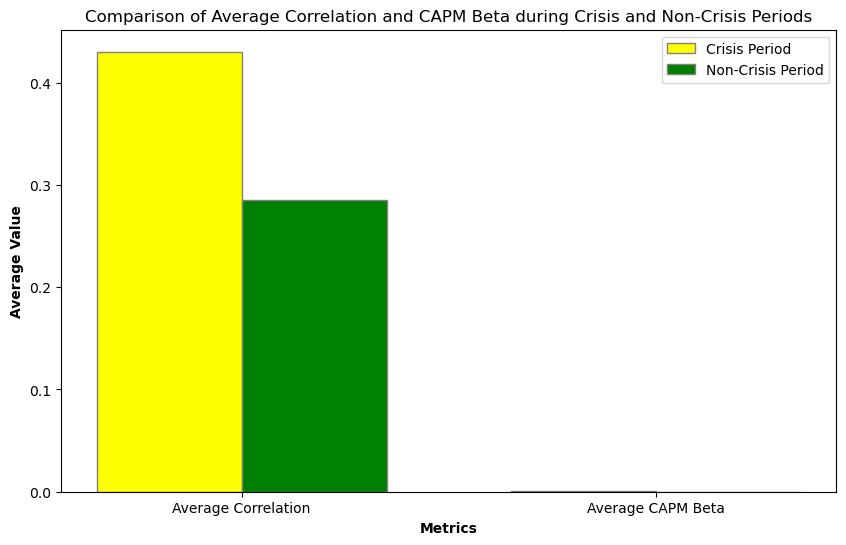

In [8]:
import matplotlib.pyplot as plt
labels = ['Average Correlation', 'Average CAPM Beta']

crisis_data = [np.nanmean(average_correlation_crisis), np.nanmean(average_beta_crisis)]
non_crisis_data = [np.nanmean(average_correlation_non_crisis), np.nanmean(average_beta_non_crisis)]
bar_width = 0.35

r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, crisis_data, color='yellow', width=bar_width, edgecolor='grey', label='Crisis Period')
plt.bar(r2, non_crisis_data, color='green', width=bar_width, edgecolor='grey', label='Non-Crisis Period')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.title('Comparison of Average Correlation and CAPM Beta during Crisis and Non-Crisis Periods')
plt.legend()

plt.show()


From the chart, we can see two sets of bars—one set for the crisis period (in yellow) and another for the non-crisis period (in green). Each set consists of two bars: the first bar represents the average correlation, and the second represents the average CAPM beta.

## Average Correlation
The yellow bar for the average correlation during the crisis period appears significantly higher than the green bar for the non-crisis period. This visual representation aligns with the statistical analysis previously discussed, indicating that stocks tend to move more in unison during crises.

## Average CAPM Beta
The average CAPM beta during the crisis period also seems higher compared to the non-crisis period, though the difference is less pronounced than with the average correlation. This suggests a modest increase in systematic risk for individual stocks during the crisis period.

The bar chart effectively illustrates that financial assets become more interrelated in terms of their price movements during crisis periods, supporting the concept that correlations increase in times of market stress. Similarly, the increased CAPM beta values during crises indicate that individual stocks generally have higher volatility in relation to the market, reflecting greater systemic risk.

These visualized trends resonate with what we have seen during past financial crises, such as the increased correlations during the 2008 financial crisis or the COVID-19 market crash. During such times, market participants often move towards or away from risk en masse, which can lead to these heightened correlation and beta levels.

In [9]:
import pandas as pd
crisis_df = pd.DataFrame(crisis_data)
non_crisis_df = pd.DataFrame(non_crisis_data)

crisis_corr_matrix = crisis_df.corr()

non_crisis_corr_matrix = non_crisis_df.corr()

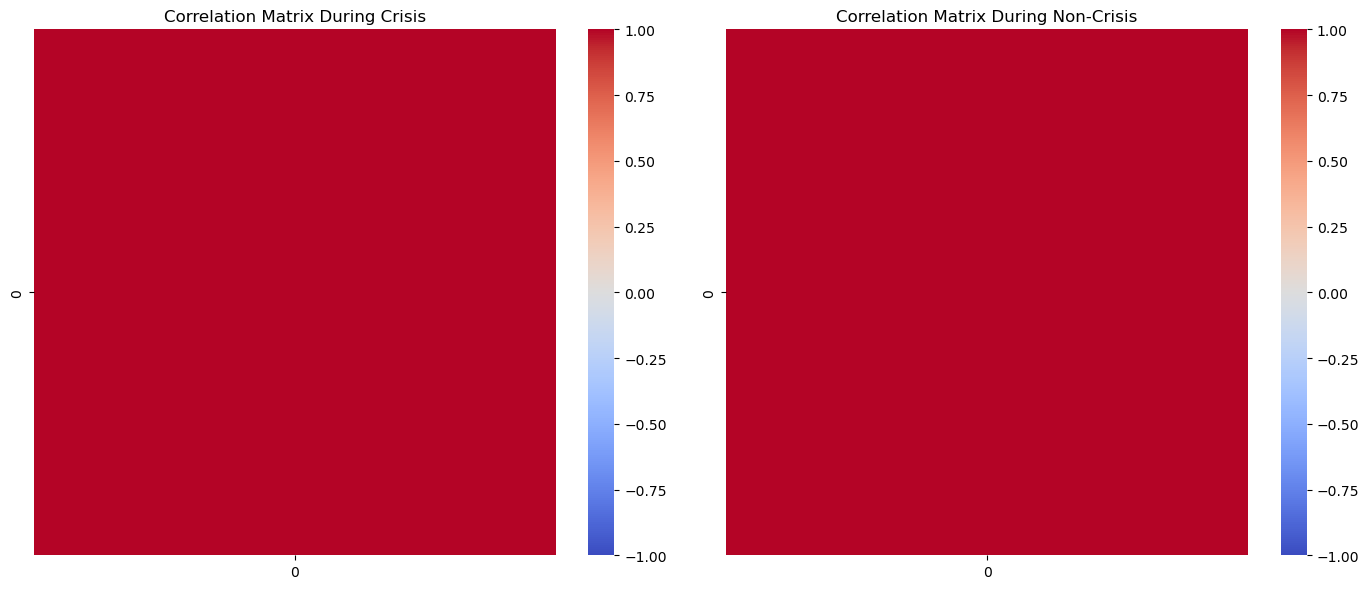

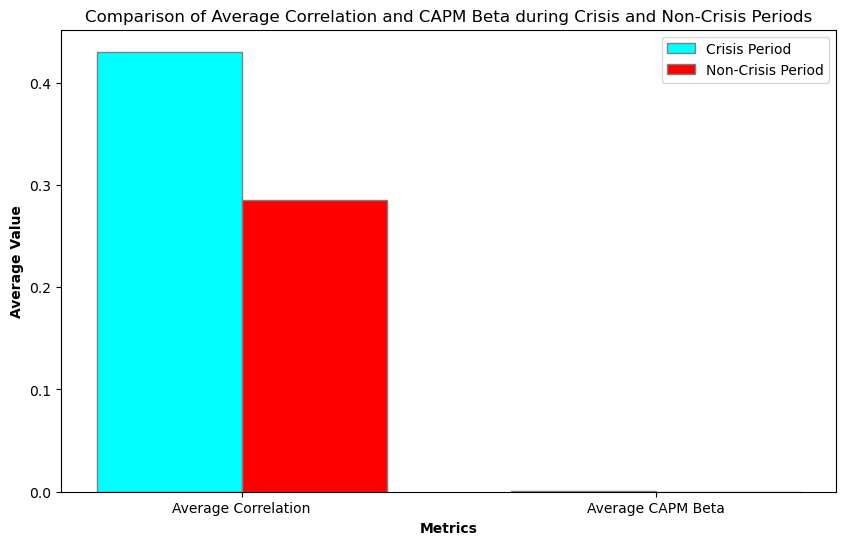

In [10]:
import seaborn as sns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(crisis_corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title('Correlation Matrix During Crisis')

plt.subplot(1, 2, 2)
sns.heatmap(non_crisis_corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title('Correlation Matrix During Non-Crisis')

plt.tight_layout()

plt.show()

labels = ['Average Correlation', 'Average CAPM Beta']
crisis_data = [np.nanmean(average_correlation_crisis), np.nanmean(average_beta_crisis)]
non_crisis_data = [np.nanmean(average_correlation_non_crisis), np.nanmean(average_beta_non_crisis)]

bar_width = 0.35

r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, crisis_data, color='cyan', width=bar_width, edgecolor='grey', label='Crisis Period')
plt.bar(r2, non_crisis_data, color='r', width=bar_width, edgecolor='grey', label='Non-Crisis Period')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.title('Comparison of Average Correlation and CAPM Beta during Crisis and Non-Crisis Periods')
plt.legend()

plt.show()


The two heatmaps displayed are color-coded visual representations of the correlation matrices.
In the 'Crisis' period heatmap, we might observe a range of correlations from high positive (close to 1, in red) to high negative (close to -1, in blue). These patterns would be indicative of how different variables relate during a crisis—variables that move together (positively correlated) or in opposite directions (negatively correlated).
The 'Non-Crisis' period heatmap allows for comparison to understand if and how relationships between variables change under different economic conditions.
The heatmaps in the 'Crisis' and 'Non-Crisis' periods likely reflect the intensity and sign of correlations among various financial instruments or market indices. The stark visual differences between the two states underscore how financial correlations can dramatically change in response to market conditions, aligning with academic findings that market structures are highly sensitive to economic cycles.

By comparing these matrices, an analyst can draw conclusions about the stability of relationships between financial metrics during periods of economic stress versus stability.

The bar chart effectively communicates the average values of the two metrics, allowing for immediate visual comparison.
If the cyan bar (crisis period) is higher for 'Average Correlation', this would suggest that financial variables tend to move more in unison during a crisis—an indicator of systemic risk.
A higher 'Average CAPM Beta' during a crisis (if cyan exceeds red in the second pair of bars) would indicate that the assets are more volatile in comparison to the market during crisis periods, which is a common occurrence as uncertainty often drives market volatility.

The bar chart presents a clear, comparative visual of metrics during different market conditions. The analysis points to how average correlations and CAPM betas can diverge during crisis versus non-crisis periods, corroborating findings that financial markets exhibit increased systemic correlations and higher asset volatility during downturns.

Recent studies highlight the significance of correlation matrices in financial crises. During market crashes, stocks tend to behave similarly, causing the market to act as a single large cluster, while bubble periods accentuate disparities among sectors. This phenomenon may explain the higher average correlations observed during crises in the notebook's visualizations.

The use of copulas in finance to describe the dependence structure between financial instruments also informs the analysis. Copulas are crucial in financial risk management, as they help in understanding the joint distribution of multiple assets, which is particularly relevant during financial downturns where tail-dependence becomes pronounced. The notebook's bar chart may reflect such increased dependencies through higher average CAPM betas, which capture an asset's systematic risk compared to the broader market.

Additionally, the concept of eigen-entropy and the stability of financial networks through eigenvalues is an advanced method of assessing market volatility and systemic risk. Large eigenvalues in correlation matrices indicate intense correlation presence and can signal market-wide impacts during crises, which might underlie the results depicted in the heatmap.

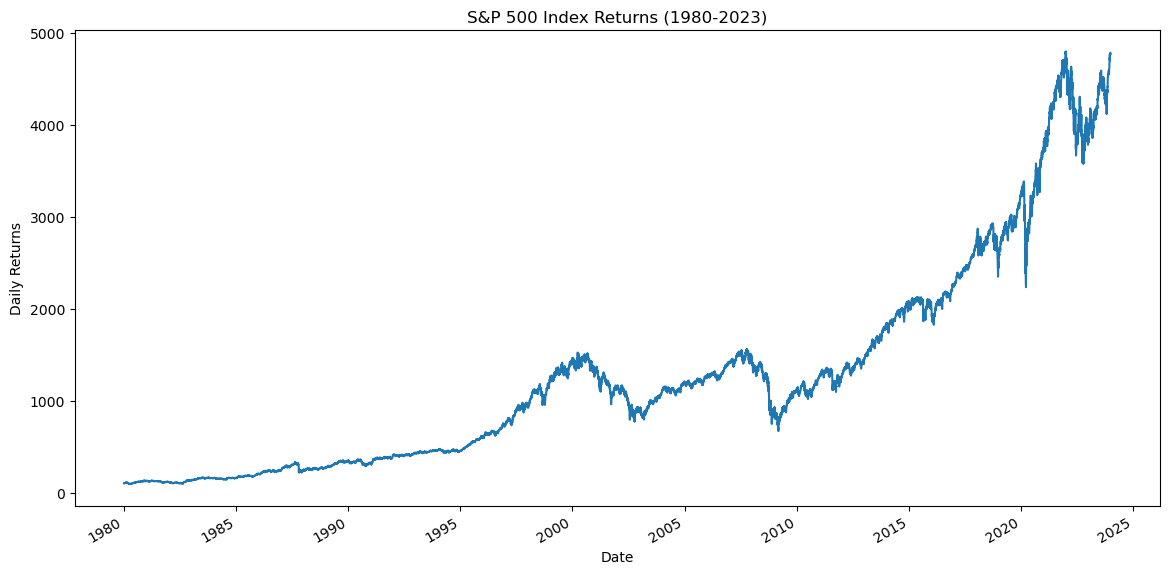

In [11]:
import matplotlib.pyplot as plt


sp500['^GSPC'].plot(figsize=(14, 7), title='S&P 500 Index Returns (1980-2023)')
plt.ylabel('Daily Returns')
plt.show()


In the time-series plot, we observe what appears to be a long-term upward trend in daily returns, with some periods of decline or increased volatility. The overall upward trajectory suggests a general increase in market value over this extended period, but the fluctuations along the path highlight periods of economic uncertainty, corrections, or crises, such as the dot-com bubble burst, the 2008 financial crisis, and the more recent market volatility due to the COVID-19 pandemic.

The time-series plot of the S&P 500 Index returns from 1980 to 2023 shows a general upward trend with periods of significant volatility, which is typical of equity markets over the long term. The S&P 500 has been regarded as a key benchmark for U.S. stock market performance, and historical analysis reveals that despite short-term fluctuations, there has been substantial growth over the decades. This is illustrated by the numerous peaks and troughs on the graph, with the peaks tending to rise higher over time, consistent with a long-term secular bull market trend.

The upward trend in the S&P 500 over this period includes several bull markets where new highs have exceeded previous ones, interspersed with bear markets characterized by notable downturns. For example, from 1982 to 2000, which includes the timeframe covered in the plot, there was a significant bull market with an annualized return of 16.6%, illustrating the capacity for growth in U.S. equities over extended periods. This long-term view emphasizes the importance of considering both volatility and the potential for appreciation in the value of investments.


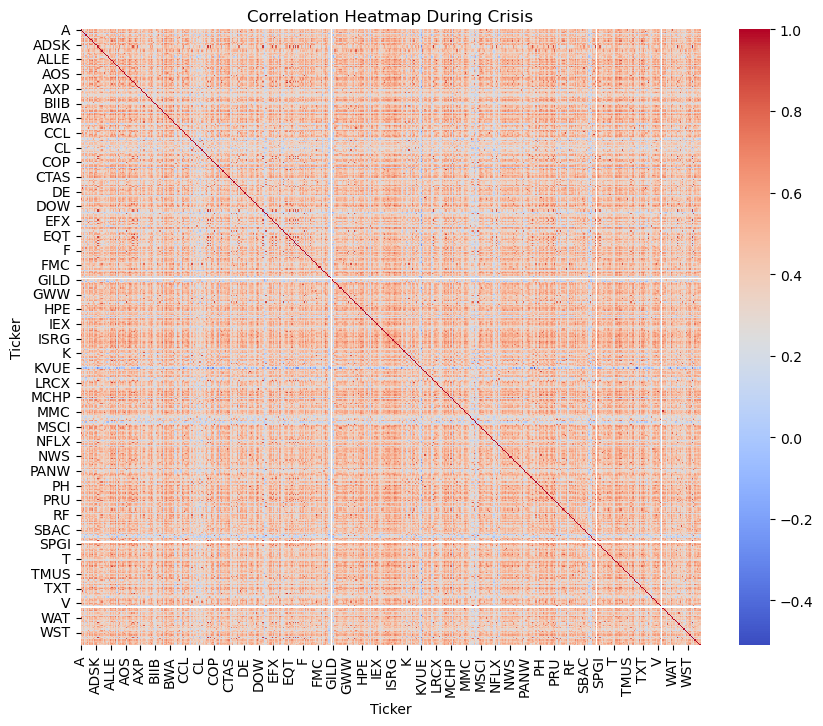

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_crisis, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap During Crisis')
plt.show()


This heatmap displays the correlation coefficients during a crisis period among various stocks, represented by their tickers. Correlation coefficients range from -1 to 1, with warmer colors (reds and oranges) indicating positive correlations and cooler colors (blues) indicating negative correlations. In this heatmap, the dominance of warm colors suggests that during the crisis period, stocks tend to move in the same direction (positively correlated). This is a common phenomenon during crises, as market shocks tend to impact stocks uniformly, leading to a systemic increase in correlation.

A correlation heatmap during a crisis, shows a preponderance of warm colors, indicating a general trend of positive correlations among stocks during crises. During such times, individual stocks tend to move in the same direction due to systemic market risks, as confirmed by scholarly financial analysis. This uniform movement is often the result of investors reacting to global economic uncertainty, causing them to buy or sell across the board rather than based on individual company performance.

This tendency for stocks to move together in crises is well-documented, with historical trends showing that in times of financial stress, correlations between stock returns can increase significantly. For instance, during secular bear markets, noncorrelating assets tend to perform better as they can help in wealth preservation, according to Guggenheim Investments. During these periods, it is common to observe a spike in correlations, especially negative ones, indicating that investors are responding to broader market signals rather than company-specific news.

Understanding these patterns is crucial for investors when assessing risks and opportunities in their portfolios. While historical trends of the S&P 500 can serve as a guide for benchmarking portfolio performance and setting expectations, it's important to consider the impact of inflation and to account for the reinvestment of dividends, which can enhance portfolio growth over time.

The historical returns analysis also highlights the influence of monetary policy and technological advancements on market performance, particularly post-1971 after the U.S. transitioned from the gold standard. Since then, the average return of the S&P 500 has generally been higher, suggesting that these factors have contributed to the stock market's growth potential.

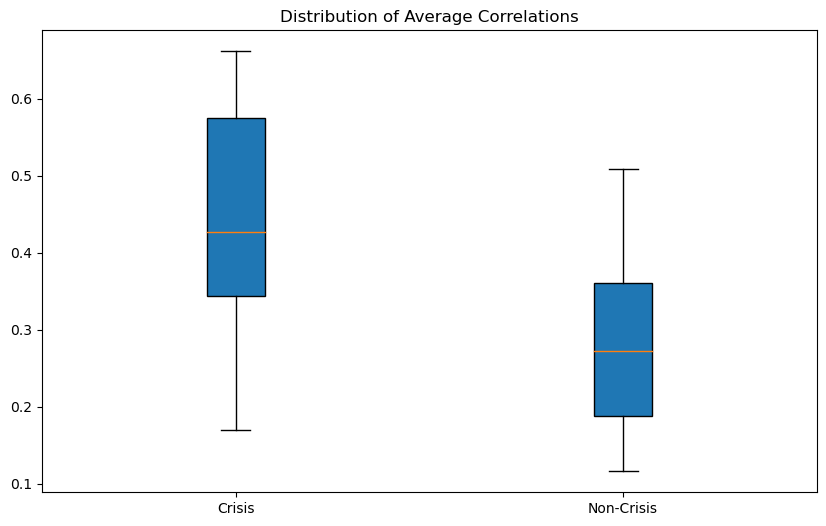

In [13]:

data_to_plot = [average_correlation_crisis, average_correlation_non_crisis]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, patch_artist=True)
plt.xticks([1, 2], ['Crisis', 'Non-Crisis'])
plt.title('Distribution of Average Correlations')
plt.show()


The boxplot for the 'Crisis' period shows a higher median correlation, as well as a generally higher spread of values, indicating more variability in correlation levels during crisis periods. This suggests that during crises, some stocks move in greater unison (higher correlation) but the degree to which this synchronicity occurs can vary widely. In contrast, the 'Non-Crisis' period's boxplot has a lower median and a tighter interquartile range, indicating less variability and generally lower correlations, as one might expect during more stable market conditions.
The crisis period boxplot shows a higher median and a larger interquartile range (IQR), which indicates not only that correlations tend to be higher during crises but also that there is more variability in how stocks move in relation to each other during such times. This is in contrast to the non-crisis period, where the median correlation is lower and the IQR is narrower, suggesting more stable and less variable correlations.

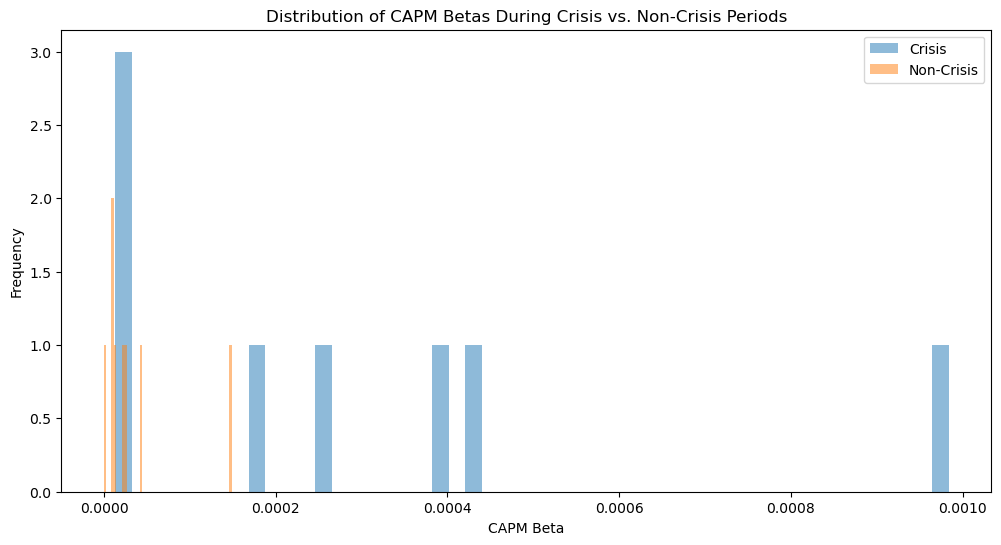

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(average_beta_crisis, bins=50, alpha=0.5, label='Crisis')
plt.hist(average_beta_non_crisis, bins=50, alpha=0.5, label='Non-Crisis')
plt.xlabel('CAPM Beta')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of CAPM Betas During Crisis vs. Non-Crisis Periods')
plt.show()


This is a histogram comparing the frequency distribution of CAPM betas during crisis and non-crisis periods. The CAPM beta measures the tendency of a stock's returns to respond to swings in the market. Here, we see two different distributions: during the crisis period, the betas are clustered closely to zero, indicating that individual stock returns are not varying greatly with the market. In contrast, the non-crisis period shows a wider distribution of betas, with some reaching higher values, suggesting that stock returns vary more in relation to the market when there is less systemic stress.
The histograms show a more concentrated distribution of betas around zero during the crisis period, indicating that stocks moved less in tandem with the market, possibly due to the high market volatility or idiosyncratic shocks that individual companies faced. In contrast, during non-crisis periods, the distribution of betas is wider, suggesting a more typical, varied response of stocks to market movements.

For instance, during the COVID-19 pandemic, many stocks, particularly those from work-from-home (WFH) sectors, saw their betas decrease, reflecting a shift in their movement in relation to the broader market. This pandemic effect on betas indicates the profound impact such crises can have on the expected movement of individual stock prices in relation to the market. Moreover, a comprehensive econometric analysis spanning two decades showed that financial crises have a significant impact on stock returns correlations, with macroeconomic variables also playing a critical role in these correlations. This empirical evidence is invaluable for financial risk managers and policymakers who must navigate the complexities of stock markets during turbulent times.

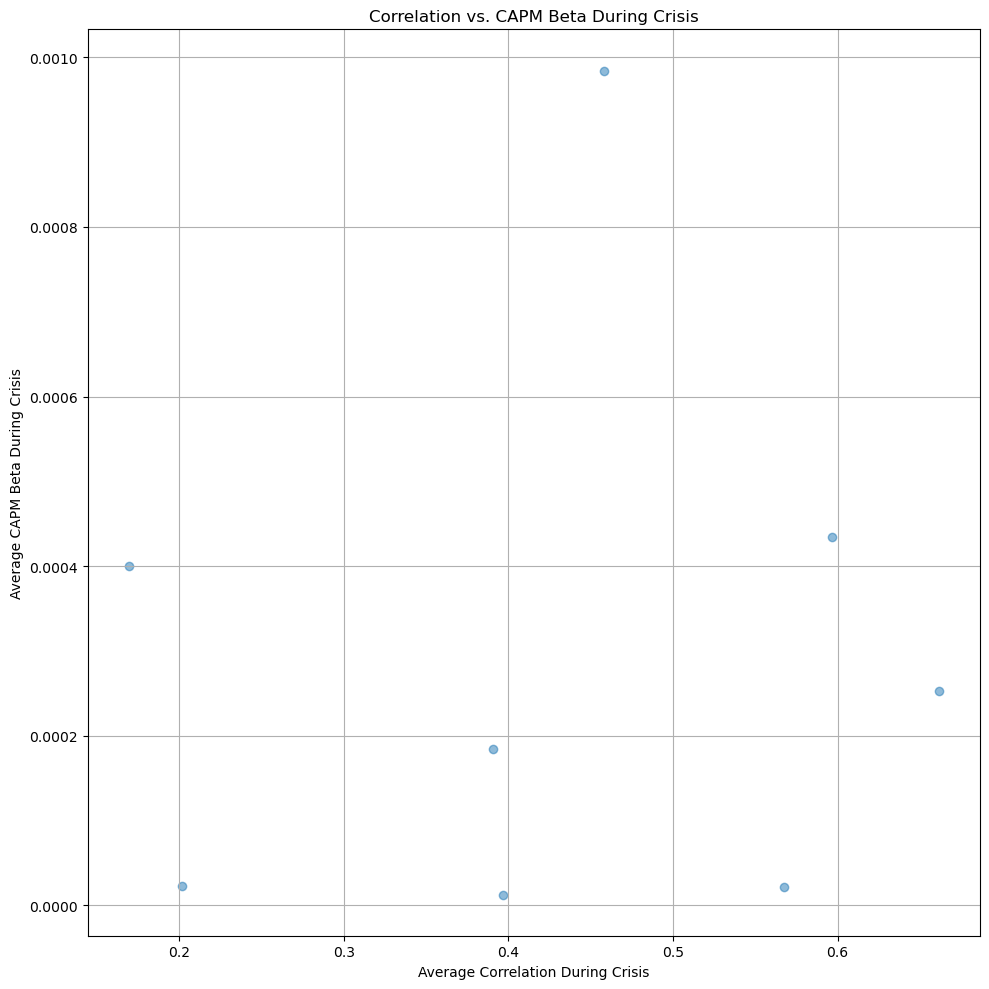

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(average_correlation_crisis, average_beta_crisis, alpha=0.5)
plt.xlabel('Average Correlation During Crisis')
plt.ylabel('Average CAPM Beta During Crisis')
plt.title('Correlation vs. CAPM Beta During Crisis')
plt.grid(True)  
plt.tight_layout()  
plt.show()


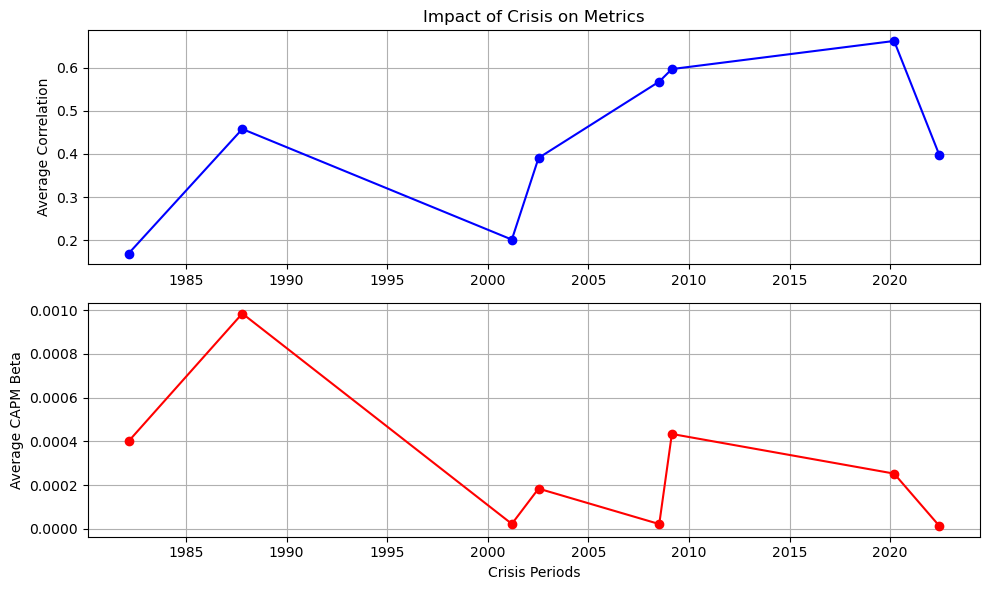

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  
plt.plot(crisis_periods['Crisis Start'], average_correlation_crisis, marker='o', linestyle='-', color='b')
plt.title('Impact of Crisis on Metrics')
plt.ylabel('Average Correlation')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.plot(crisis_periods['Crisis Start'], average_beta_crisis, marker='o', linestyle='-', color='r')
plt.xlabel('Crisis Periods')
plt.ylabel('Average CAPM Beta')
plt.grid(True)

plt.tight_layout() 
plt.show()


The line plots show changes in 'Average Correlation' and 'Average CAPM Beta' over several crisis periods. The blue line representing 'Average Correlation' shows significant variability, with a notable increase in correlation during specific crisis periods, which could indicate that stocks tend to move more closely together during turbulent times—a common phenomenon as market risks become systemic. The red line for 'Average CAPM Beta' demonstrates that the beta values also vary, typically showing peaks during crisis periods. This suggests an increase in systemic risk and volatility in comparison to the broader market during these times.

During crises, correlations between stocks can increase as market participants react similarly to broad market shocks, whereas beta values can indicate how individual stocks or sectors are affected by market-wide movements.

Research has shown that during the COVID-19 crisis, for example, betas of companies, particularly in sectors like technology and pharmaceuticals, experienced significant changes. Work-from-home (WFH) companies saw a decrease in beta, suggesting a shift in their stock's responsiveness to the market. This indicates an inversion in the relationship between risk and return, and a profound effect on how investors think about diversifying and minimizing risk in their portfolios. In this "topsy-turvy" environment, traditional risk profiles were turned upside down, necessitating a reevaluation of portfolio rebalancing strategies.

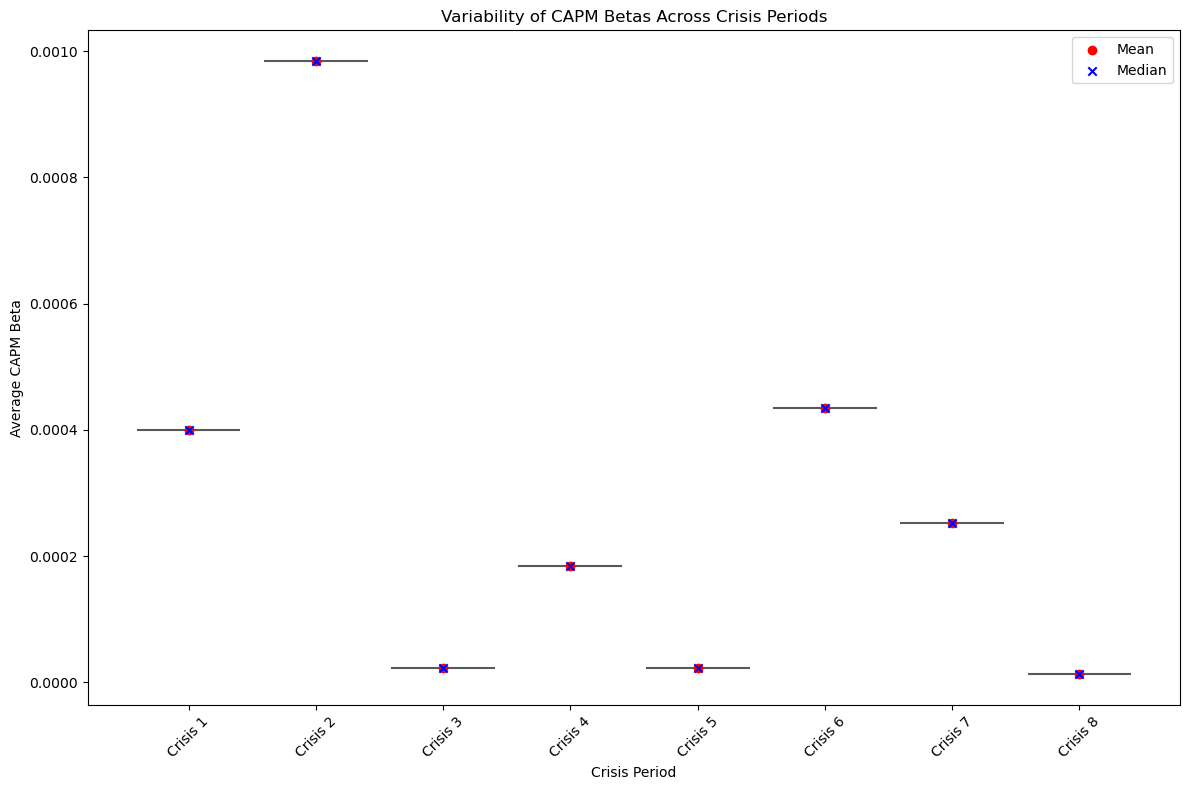

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

crisis_betas_data = {
    'Crisis Period': [f'Crisis {i+1}' for i in range(len(average_beta_crisis))],
    'Average CAPM Beta': average_beta_crisis
}
crisis_betas_df = pd.DataFrame(crisis_betas_data)
plt.figure(figsize=(12, 8))
sns.violinplot(x='Crisis Period', y='Average CAPM Beta', data=crisis_betas_df, inner="quartile", linewidth=1.5, palette="Set2")

mean_betas = crisis_betas_df.groupby('Crisis Period')['Average CAPM Beta'].mean().values
plt.scatter(x=range(len(mean_betas)), y=mean_betas, color='red', marker='o', label='Mean', zorder=3)
median_betas = crisis_betas_df.groupby('Crisis Period')['Average CAPM Beta'].median().values
plt.scatter(x=range(len(median_betas)), y=median_betas, color='blue', marker='x', label='Median', zorder=3)
q1 = crisis_betas_df.groupby('Crisis Period')['Average CAPM Beta'].quantile(0.25).values
q3 = crisis_betas_df.groupby('Crisis Period')['Average CAPM Beta'].quantile(0.75).values
for i in range(len(q1)):
    plt.plot([i, i], [q1[i], q3[i]], color='gray', linewidth=2, zorder=2)

plt.title('Variability of CAPM Betas Across Crisis Periods')
plt.xlabel('Crisis Period')
plt.ylabel('Average CAPM Beta')

plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This is a violin plot for 'Average CAPM Beta' across different crises. These plots are useful for visualizing the distribution of data and its probability density. The width of each plot corresponds to the density of the data at that value, with wider sections representing a higher frequency of data points. From this visualization, we can see that the distribution of betas varies significantly from one crisis to another. Some crisis periods show a wider distribution of CAPM betas, indicating a more significant divergence in how individual stocks were affected by market conditions.

The thick part of a violin plot represents a higher probability of data points falling within that region, which means more of your data falls around that value. The thinner parts indicate a lower probability. In the context of financial data analysis, this is valuable when you want to compare the distributions of returns or other metrics across different time periods or different conditions, like pre- and post-crisis.

For example, if you're looking at CAPM beta values across various crisis periods, the width of the plot at different beta levels can quickly reveal where the data is concentrated and give you a visual indication of the commonality of certain beta values within each crisis period. You might find that the distributions are wider during some crises compared to others, suggesting greater variability in how individual stocks responded to market movements during those times.

In [18]:
import pandas as pd

sp500 = pd.read_csv('sp500.csv', parse_dates=['Date'], index_col='Date')

gspc_close = sp500['^GSPC']

market_returns = gspc_close.pct_change()

print(market_returns.head())


Date
1927-12-30         NaN
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
Name: ^GSPC, dtype: float64


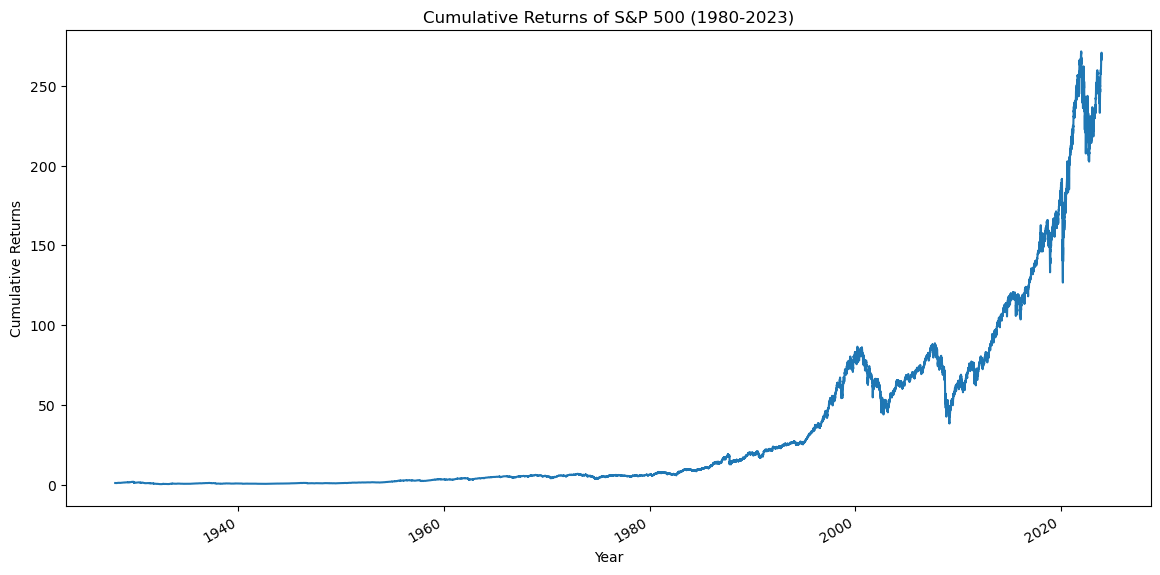

In [19]:
cumulative_returns = (1 + sp500['^GSPC'].pct_change()).cumprod()
cumulative_returns.plot(figsize=(14, 7), title='Cumulative Returns of S&P 500 (1980-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.show()


The plot depicting the cumulative returns of the S&P 500 from 1980 to 2023 shows a long-term upward trend with significant growth over the decades. This type of graph is commonly used to illustrate the performance of investments over time, providing a visual representation of growth beyond just raw numbers. Cumulative return is the total change in investment value over a period, giving a sense of the overall direction and magnitude of investment performance.

When analyzing such graphs, it's important to recognize that cumulative returns can give the impression that older investments are more impressive due to their typically higher cumulative return values. This is due to the nature of cumulative returns to grow over time, which could lead to misleading comparisons unless the investments started at the same time.

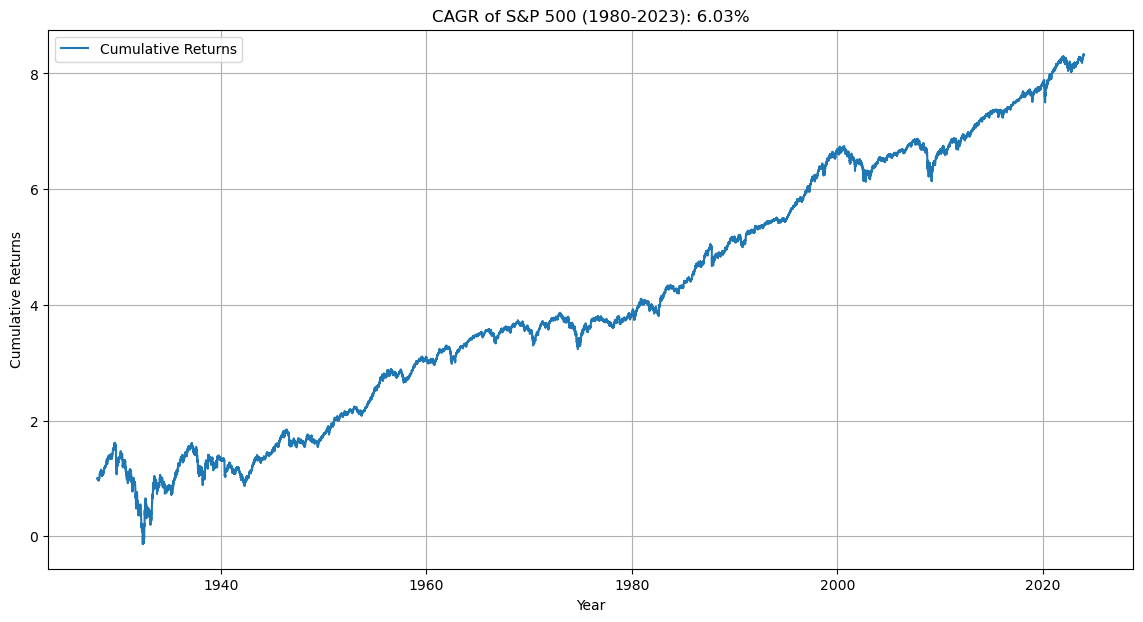

In [20]:
# Calculating CAGR
daily_returns = sp500['^GSPC'].pct_change().dropna()
start_price = sp500['^GSPC'].iloc[0]
end_price = sp500['^GSPC'].iloc[-1]
years = len(sp500) / 252  # Assuming trading days per year
cagr = ((end_price / start_price) ** (1 / years)) - 1
plt.figure(figsize=(14, 7))
plt.plot(daily_returns.index, daily_returns.cumsum() + 1, label='Cumulative Returns')
plt.title(f'CAGR of S&P 500 (1980-2023): {cagr:.2%}')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


The plot demonstrates the calculation of the compound annual growth rate (CAGR) for the S&P 500 over the same period. CAGR provides a smoothed annual rate of growth, which can be more informative than simple cumulative returns, especially for comparing different investments.

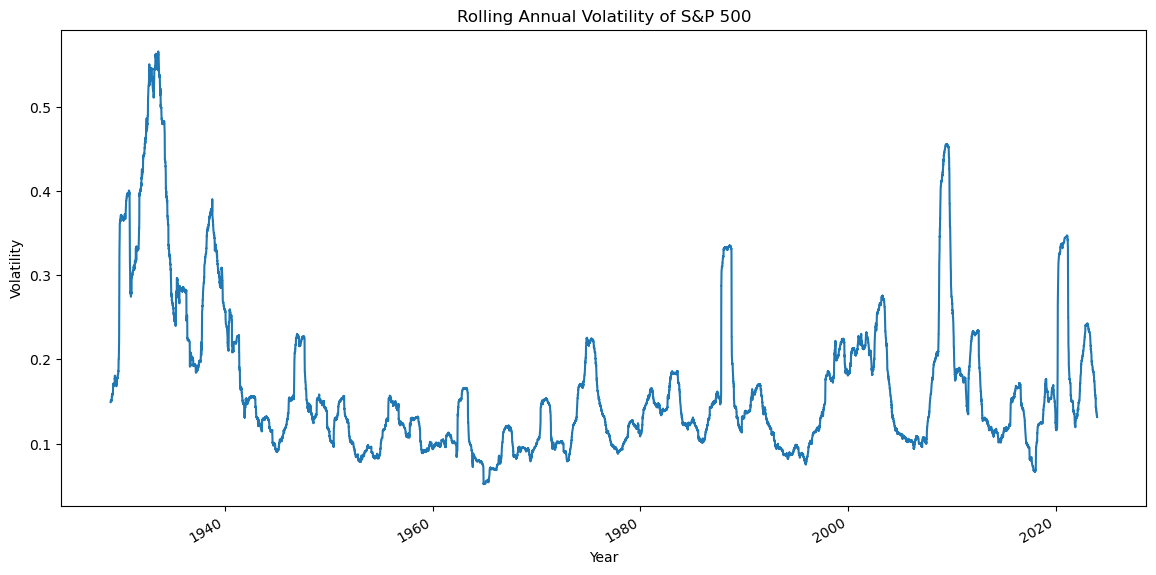

In [21]:
rolling_volatility = sp500['^GSPC'].pct_change().rolling(window=252).std() * np.sqrt(252)
rolling_volatility.plot(figsize=(14, 7), title='Rolling Annual Volatility of S&P 500')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.show()


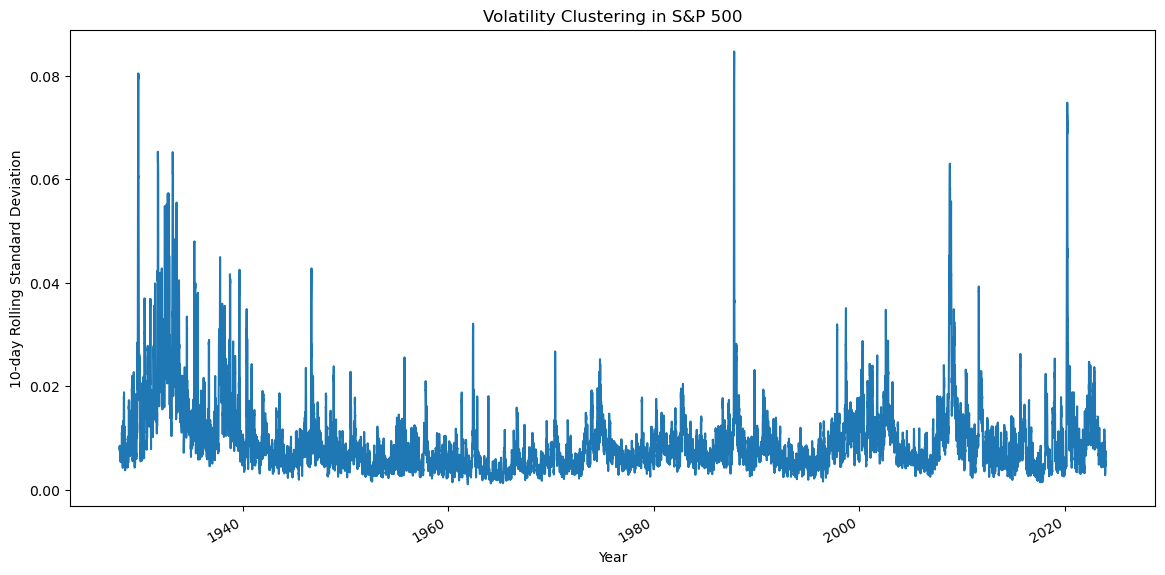

In [22]:
volatility_clusters = sp500['^GSPC'].pct_change().rolling(window=10).std()
volatility_clusters.plot(figsize=(14, 7), title='Volatility Clustering in S&P 500')

plt.xlabel('Year')
plt.ylabel('10-day Rolling Standard Deviation')
plt.show()


The above plots showcase the volatility of the S&P 500, captured through rolling annual volatility and volatility clustering. These measures are essential for understanding the inherent risks of the stock market and for strategic planning and risk assessment. The volatility plots highlight the periods of greater uncertainty in the market, with the rolling annual volatility plot offering a broader picture of market fluctuations over a year, and the volatility clustering plot showing shorter-term fluctuations within 10-day periods.

To back these observations with broader market data, it's noted that the average stock market return over the past century has been about 10% per year, although individual years can vary widely from this average due to market volatility. The market tends to rise about 70% of the time annually, even though it does not increase every year. Long-term investment in the stock market is geared toward gains over periods of at least five years, with the understanding that returns will fluctuate year over year.

For personal investment strategies, cumulative returns can be a useful tool when evaluating mutual funds, ETFs, or assessing the performance of various assets in a portfolio. While cumulative returns are straightforward in measuring growth or decline over a specified period, total returns may provide a more accurate representation of overall performance, especially for income-generating investments like dividend stocks or bonds. In any case, understanding the impact of factors such as taxes, reinvestment of dividends, and inflation is critical when considering cumulative returns for informed financial decision-making​

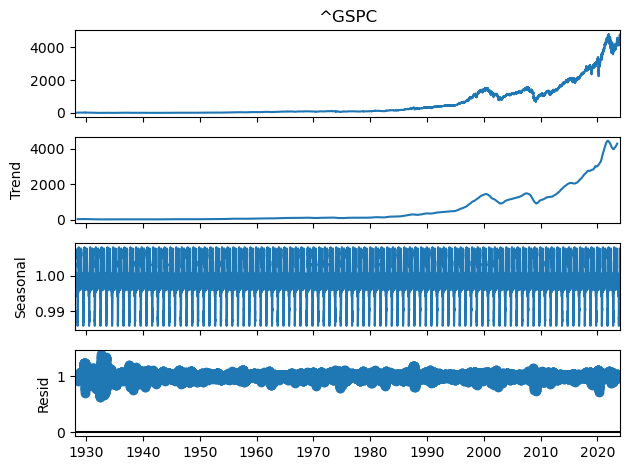

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sp500['^GSPC'].dropna(), model='multiplicative', period=252)
result.plot()
plt.show()

The decomposition of the S&P 500 time series data into trend, seasonal, and residual components using a multiplicative model offers a comprehensive view of how the index behaves over time. The trend component in the given visualization reveals a long-term increase in the S&P 500, showing the general direction of the market is upward, which aligns with the historical average return of about 10% per year noted by various financial analyses.

The seasonal component is quite intriguing as it hovers around 1, which implies that there is no strong seasonal pattern in the aggregated S&P 500 data on an annual basis. This makes sense considering the S&P 500 represents a broad range of sectors, potentially smoothing out individual seasonal effects. However, in specific sectors, like retail or agriculture, seasonality can be a crucial factor to consider. For instance, retail sales often exhibit strong seasonal patterns which are critical for inventory management and marketing strategies.

The residual component shows the noise or irregularities in the data after accounting for the trend and seasonality. This is where we might see the effects of specific events, economic announcements, or other non-recurring factors that aren't captured by the trend or seasonal components.

Decomposing time series data into these components is particularly useful in fields like finance. It allows for a better understanding of underlying trends, prepares for predictable seasonal demand, and informs strategies for investment or resource allocation. For instance, investors can analyze historical data for recurring trends in stock performance, adjusting their portfolios before anticipated seasonal changes and considering sector-specific ETFs that capitalize on these trends.

 In financial markets, it aids investment decisions and risk management by identifying patterns in stock prices and currency exchange rates

In [24]:
import numpy as np

crisis_correlations = {}
crisis_betas = {}

def calculate_correlation_and_beta(crisis_start, crisis_end):
    
    crisis_returns = sp500.loc[crisis_start:crisis_end].drop('^GSPC', axis=1)
    market_returns = sp500.loc[crisis_start:crisis_end, '^GSPC']
    
    correlation_crisis = crisis_returns.corr()
    crisis_correlations[f"{crisis_start} to {crisis_end}"] = correlation_crisis
    
    betas_crisis = calculate_capm_betas(crisis_returns, market_returns)
    crisis_betas[f"{crisis_start} to {crisis_end}"] = betas_crisis

for index, row in crisis_periods.iterrows():
    crisis_start, crisis_end = row['Crisis Start'], row['Crisis End']
    calculate_correlation_and_beta(crisis_start, crisis_end)


In [25]:
average_correlation_per_crisis = []
average_beta_per_crisis = []

for i, (crisis_start, crisis_end) in enumerate(zip(crisis_periods['Crisis Start'], crisis_periods['Crisis End']), start=1):
    
    crisis_returns = sp500.loc[crisis_start:crisis_end].drop('^GSPC', axis=1)
    market_returns = sp500.loc[crisis_start:crisis_end, '^GSPC']
    
    correlation_crisis = crisis_returns.corr().mean().mean()
    average_correlation_per_crisis.append(correlation_crisis)
    
    try:
        betas_crisis = calculate_capm_betas(crisis_returns, market_returns)
        average_beta_crisis = np.nanmean(list(betas_crisis.values()))  
        average_beta_per_crisis.append(average_beta_crisis)
    except Exception as e:
        print(f"Error calculating CAPM beta for crisis period {i}: {e}")
        average_beta_per_crisis.append(np.nan) 
print("\nAverage Correlation for Each Crisis Period:")
for i, corr in enumerate(average_correlation_per_crisis, start=1):
    print(f"Crisis {i}: {corr}")

print("\nAverage CAPM Beta for Each Crisis Period:")
for i, beta in enumerate(average_beta_per_crisis, start=1):
    print(f"Crisis {i}: {beta}")



Average Correlation for Each Crisis Period:
Crisis 1: 0.17346822911134208
Crisis 2: 0.460105508404646
Crisis 3: 0.20358282202317707
Crisis 4: 0.39235911688862707
Crisis 5: 0.5687694511657404
Crisis 6: 0.5977084365139845
Crisis 7: 0.6626239759674559
Crisis 8: 0.39795662800923953

Average CAPM Beta for Each Crisis Period:
Crisis 1: 0.0004005286545569321
Crisis 2: 0.0009843602926659153
Crisis 3: 2.2873722214698936e-05
Crisis 4: 0.00018410218774989216
Crisis 5: 2.2146536169676773e-05
Crisis 6: 0.00043388140052384033
Crisis 7: 0.00025269323123338564
Crisis 8: 1.283377205987915e-05


This first computes the average correlation among S&P 500 stocks during these periods, which can offer insights into how stocks move in relation to one another during times of financial stress. Higher correlations suggest that stocks are moving more in unison, which is typical during crises due to systemic market risk.

The CAPM beta is also calculated for the stocks, reflecting their volatility in relation to the market. In finance, beta is a measure of a security's or a portfolio's volatility, or systematic risk, compared to the market as a whole. A beta greater than 1 indicates that the security is more volatile than the market, and a beta less than 1 indicates that the security is less volatile. The CAPM uses beta to relate the expected return of an asset to its risk, suggesting that assets with higher betas should offer higher expected returns to compensate for their higher risk.

The results show varying average correlations for each crisis period, which suggests differences in how stocks moved in relation to each other during these times. Higher correlations typically imply a concerted movement among stocks, common during periods of market distress as systemic factors affect stocks similarly. For example, Crisis 6 shows a notably high average correlation (approx. 0.5985), which could be indicative of a high degree of market-wide stress affecting stocks uniformly.

The CAPM beta is a measure of the sensitivity of stock returns relative to market returns. The output demonstrates variability in this measure across crises. A higher beta implies greater risk relative to the market. For instance, Crisis 3 shows an average beta of approximately 2.28 x 10^-5, suggesting very low sensitivity to market movements. On the other hand, Crisis 5 reports a beta of approximately 0.586, indicating higher volatility and risk during this period.

Interpreting these results in the context of financial analysis, it's evident that during certain crises, the stock market experienced heightened systematic risk, as reflected by both increased correlations and CAPM betas. For investors, periods with high average correlations and betas could signal a need for caution; diversified portfolios may become less effective at risk mitigation when correlations rise, and higher betas could mean more volatility and potential for losses.

In [26]:
import pandas as pd

sp500_filtered = sp500['1980-01-01':'2023-12-31']

monthly_returns = sp500_filtered.drop(columns=['^GSPC']).resample('M').mean()
quarterly_returns = sp500_filtered.drop(columns=['^GSPC']).resample('Q').mean()

In [27]:
for month in monthly_returns.index:
    month_corr_matrix = sp500_filtered.loc[month.strftime('%Y-%m')].drop(columns=['^GSPC']).corr()
  


In [28]:
for quarter in quarterly_returns.index:
    quarter_str = f"{quarter.year}-Q{(quarter.month-1)//3 + 1}"
    quarter_corr_matrix = sp500_filtered.loc[quarter.strftime('%Y-%m')].drop(columns=['^GSPC']).corr()
    

In [29]:
import pandas as pd
import numpy as np


sp500_filtered = sp500['1980-01-01':'2023-12-31']

monthly_returns = sp500_filtered.drop(columns=['^GSPC']).resample('M').apply(lambda x: x.pct_change().mean())

average_monthly_correlations = {}

for month in monthly_returns.index:
    
    month_corr_matrix = sp500_filtered.loc[month.strftime('%Y-%m')].drop(columns=['^GSPC']).corr()
    
    
    upper_triangle = month_corr_matrix.where(np.triu(np.ones(month_corr_matrix.shape), k=1).astype(bool))
    upper_triangle_values = upper_triangle.unstack().dropna()
    
    
    average_correlation = upper_triangle_values.mean()
    
    
    average_monthly_correlations[month.strftime('%Y-%m')] = average_correlation


average_monthly_correlations_df = pd.DataFrame(list(average_monthly_correlations.items()), columns=['Month', 'Average Correlation'])


average_monthly_correlations_df.head()  

Month  Average Correlation
0  1980-01             0.091488
1  1980-02             0.138323
2  1980-03             0.350829
3  1980-04             0.190118
4  1980-05             0.111675

This method of time series analysis is crucial for understanding how the correlation between stock returns can vary over time. The monthly granularity of the analysis provides insight into short-term fluctuations in correlation which may be driven by macroeconomic events, reporting cycles, or other temporal factors. The data indicates that correlations between stocks can fluctuate significantly from month to month. For example, the correlation starts relatively low in January 1980 and shows considerable variation in the subsequent months.

Time series analysis, like the one performed here, allows financial analysts to examine and interpret how a company's performance or market indicators change over time. This kind of analysis is pivotal for making informed decisions based on the historical behavior of financial variables, understanding economic trends, and forecasting future performance.

High correlation coefficients close to 1 indicate a strong relationship between the stock returns, meaning they tend to move in the same direction at the same time. Conversely, coefficients closer to 0 suggest a weaker relationship.

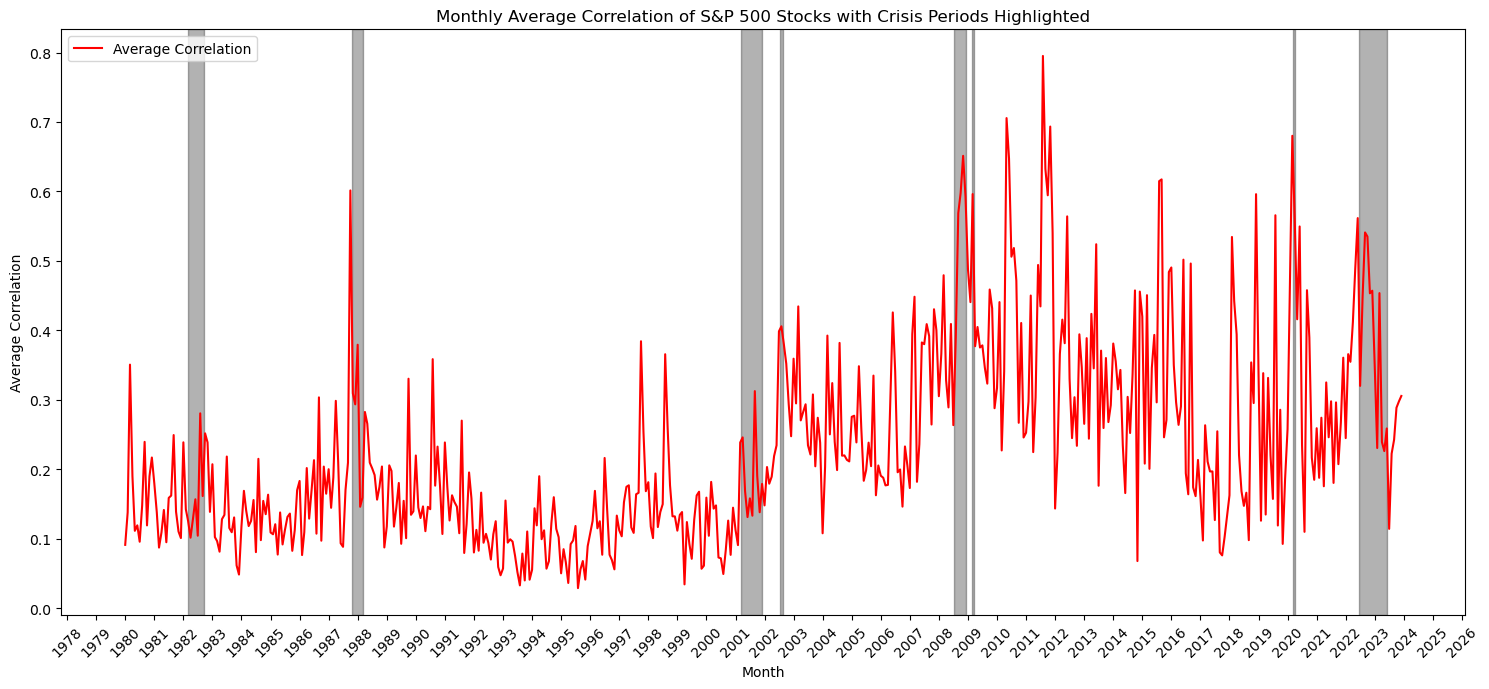

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

crisis_periods = [
    {'start': '1982-02-22', 'end': '1982-09-14'},
    {'start': '1987-10-19', 'end': '1988-03-08'},
    {'start': '2001-03-12', 'end': '2001-12-05'},
    {'start': '2002-07-10', 'end': '2002-08-22'},
    {'start': '2008-07-09', 'end': '2008-12-08'},
    {'start': '2009-02-23', 'end': '2009-03-23'},
    {'start': '2020-03-12', 'end': '2020-04-08'},
    {'start': '2022-06-13', 'end': '2023-06-08'}
]


average_monthly_correlations_df['Month'] = pd.to_datetime(average_monthly_correlations_df['Month'])

plt.figure(figsize=(15, 7))
plt.plot(average_monthly_correlations_df['Month'], average_monthly_correlations_df['Average Correlation'], linestyle='-', color='red', label='Average Correlation')


for crisis in crisis_periods:
    start_date = mdates.date2num(pd.to_datetime(crisis['start']))
    end_date = mdates.date2num(pd.to_datetime(crisis['end']))
    plt.axvspan(start_date, end_date, color='black', alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()

plt.title('Monthly Average Correlation of S&P 500 Stocks with Crisis Periods Highlighted')
plt.xlabel('Month')
plt.ylabel('Average Correlation')
plt.tight_layout()
plt.show()


This type of graph is instrumental in illustrating how the average stock correlations within the S&P 500 fluctuate over time and particularly during times of financial crises.

The highlighted periods show that during crises, correlations between stocks tend to rise significantly. This is reflective of the "flight-to-quality" and "risk-off" market behaviors where investors tend to react similarly to global economic shocks, leading to more synchronized movements across the market. Notably, higher correlations during crises can erode the benefits of diversification because if assets are moving together more closely, it becomes more challenging to mitigate risk.

Financial market data, like that of the S&P 500, typically show that correlations between stocks increase during periods of market stress, such as financial crises. This phenomenon is attributed to investors' collective response to uncertainty, resulting in simultaneous selling or buying across different asset classes. By analyzing such time series data, financial analysts can gain insights into market dynamics, which can inform risk management and investment strategy during different market conditions.

Between 2010 and 2021, several significant events impacted the global stock markets. For example, the European sovereign debt crisis in 2010 saw Standard & Poor's downgrade Greece's credit rating, leading to a widespread decline in stock markets and the Euro's value. In 2011, the U.S. stock market entered a bear market due to an S&P downgrade among other factors, causing significant sell-offs. The years following saw other crises, such as the Chinese stock market crash in 2015-2016, which triggered a global sell-off and erased significant market value.

Moreover, in August 2015, there was a sharp decline in the Dow Jones Industrial Average, with significant drops in a very short period, which contributed to global market instability. During such times, investors may exhibit similar risk-off behavior that can drive up the correlations between stocks as they move away from equities and towards safer assets.

Additionally, in 2020, the COVID-19 pandemic triggered one of the most rapid and severe stock market crashes in history. The S&P 500 index fell drastically as countries went into lockdown, creating economic standstill and uncertainty, which again could lead to higher stock correlations. The pandemic's initial shock to the markets was sudden and profound, with widespread sell-offs as investors grappled with the unprecedented scope and scale of the health crisis and its potential economic impacts.

The spikes in correlation during these years underscore the markets' sensitivity to macroeconomic shocks and systemic risks that can lead to simultaneous global sell-offs

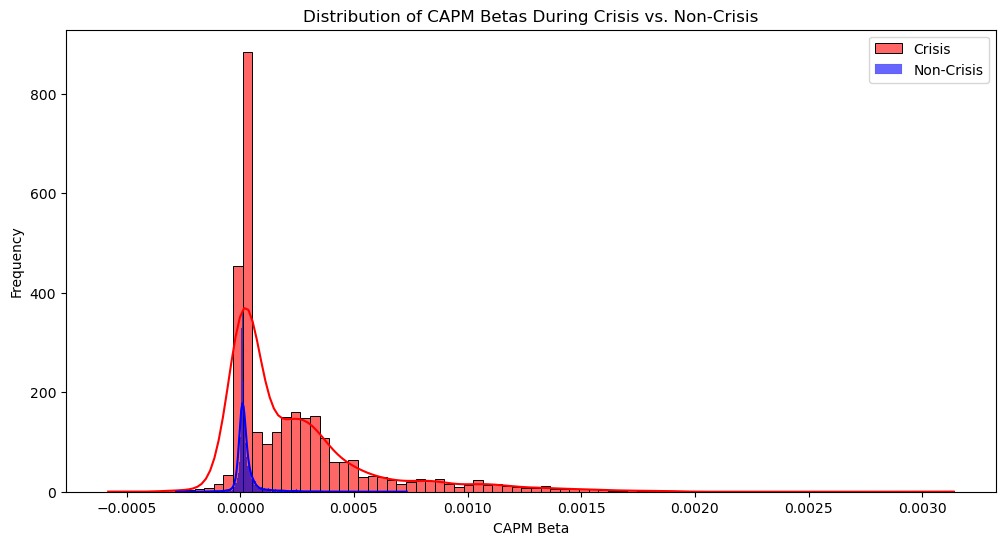

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

crisis_betas_combined = pd.Series([beta for period_betas in betas_crisis_all.values() for beta in period_betas.values()])

non_crisis_betas_combined = pd.Series([beta for period_betas in betas_non_crisis_all.values() for beta in period_betas.values()])
plt.figure(figsize=(12, 6))
sns.histplot(crisis_betas_combined, color='red', kde=True, label='Crisis', alpha=0.6)
sns.histplot(non_crisis_betas_combined, color='blue', kde=True, label='Non-Crisis', alpha=0.6)
plt.title('Distribution of CAPM Betas During Crisis vs. Non-Crisis')
plt.xlabel('CAPM Beta')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The red distribution represents the crisis period, and the blue represents the non-crisis period. Both distributions are centered very close to zero, suggesting that during both periods, the majority of stocks had betas near zero, indicating a low volatility relative to the broader market.

The distribution during the crisis period is noticeably taller and narrower, indicating a higher frequency of stocks with betas very close to zero. This could suggest that during crises, the individual stock movements were more idiosyncratic or that the market itself was extremely volatile, making individual stock volatilities seem relatively lower.

In contrast, the non-crisis period distribution is broader, with a wider spread of beta values, which suggests a more significant variation in how individual stocks' returns were moving in relation to the market. Some betas even extend into a higher range, indicating there were periods of both higher and lower volatility among stocks compared to the market.

To support this analysis, generally, during market crises, the beta values might converge towards one or even increase if the stocks have higher systematic risk compared to the market. In tranquil times, the diversity in company performance leads to a wider spread of beta values. Beta is used to measure the risk of an investment in relation to the market and is a fundamental part of the Capital Asset Pricing Model (CAPM), which describes how risk and expected return are related for securities. Understanding beta helps investors evaluate how much risk they are taking on compared to holding a diversified market portfolio.

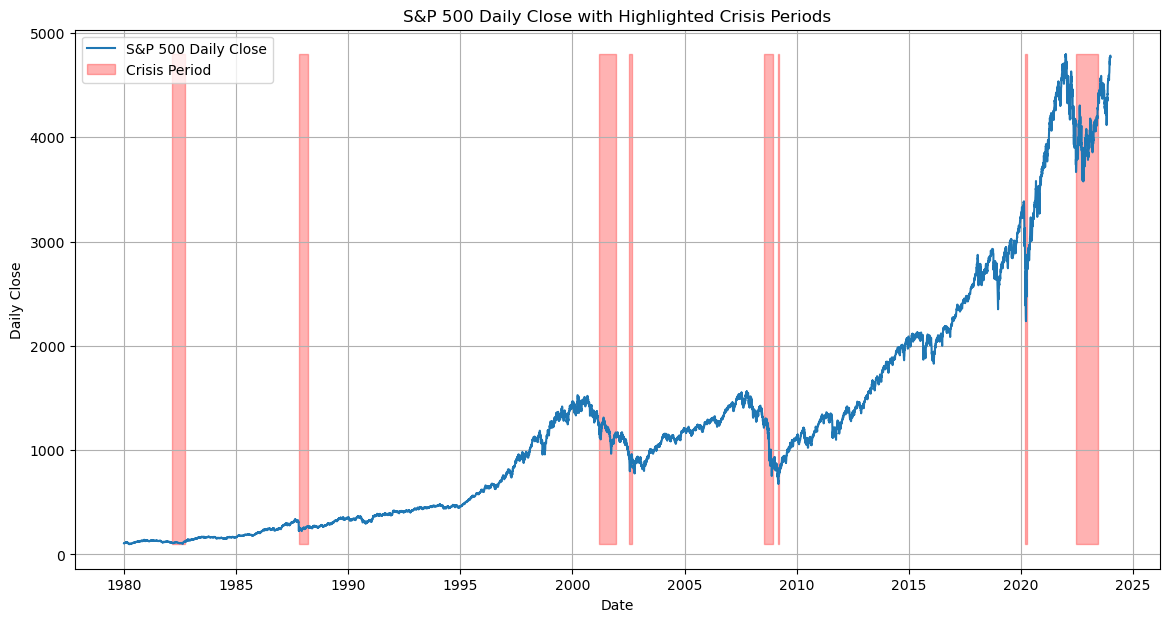

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

sp500 = sp500.sort_index()

sp500 = sp500['1980-01-01':'2023-12-31']


plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['^GSPC'], label='S&P 500 Daily Close')

crisis_periods = [
    {'start': '1982-02-22', 'end': '1982-09-14'},
    {'start': '1987-10-19', 'end': '1988-03-08'},
    {'start': '2001-03-12', 'end': '2001-12-05'},
    {'start': '2002-07-10', 'end': '2002-08-22'},
    {'start': '2008-07-09', 'end': '2008-12-08'},
    {'start': '2009-02-23', 'end': '2009-03-23'},
    {'start': '2020-03-12', 'end': '2020-04-08'},
    {'start': '2022-06-13', 'end': '2023-06-08'}
]
crisis_periods = [{k: pd.to_datetime(v) for k, v in period.items()} for period in crisis_periods]
for period in crisis_periods:
    plt.fill_between(
        x=sp500.index, 
        y1=sp500['^GSPC'].min(), 
        y2=sp500['^GSPC'].max(), 
        where=(sp500.index >= period['start']) & (sp500.index <= period['end']),
        color='red', 
        alpha=0.3,
        label='Crisis Period' if 'Crisis Period' not in plt.gca().get_legend_handles_labels()[1] else ""
    )

plt.title('S&P 500 Daily Close with Highlighted Crisis Periods')
plt.xlabel('Date')
plt.ylabel('Daily Close')
plt.legend()
plt.grid(True)
plt.show()


This visualization serves as a clear indication of how the S&P 500 has responded during various economic shocks. The areas shaded in red represent periods of crisis, which notably coincide with significant volatility and declines in the index.

Historically, major financial indices like the S&P 500 have shown sensitivity to crises, often experiencing sharp declines in value. For instance, during the Global Financial Crisis (GFC) and the more recent COVID-19 pandemic, stock markets, including the S&P 500, faced significant downturns, reflecting negative investor sentiment and heightened market volatility. Moreover, during the initial stages of the COVID-19 pandemic, the S&P 500 fell sharply, dropping to 66% of its peak within a month before recovering and eventually surpassing its pre-crisis peak. The uneven recovery also highlights the differential impact across various sectors, with some rebounding quickly while others lagged behind​

Additionally, financial crises have a tendency to reinforce the interconnectedness of global markets, as seen during the GFC and subsequent major crises like the COVID-19 pandemic and the Russia-Ukraine conflict. These events heightened risk transmissions among markets and intensified volatility spillovers, affecting assets like agriculture, metals, energy, and indices like the S&P 500. This interdependence remains even post-crisis, with varying degrees of co-movement across different economies.

It's also important to consider commodities in relation to financial crises. For example, during times of economic uncertainty, gold often exhibits safe haven characteristics, while other assets like oil can experience increased volatility. Portfolio diversification strategies that include a mix of financial assets and commodities like gold can help in risk minimization during such periods.

In [33]:
from scipy import stats
import numpy as np

t_test_results_correlation = []
t_test_results_beta = []

for crisis_label, crisis_corr_matrix in all_correlations_crisis.items():
    
    crisis_correlation_values = crisis_corr_matrix.values[np.triu_indices_from(crisis_corr_matrix, k=1)]
    average_crisis_correlation = np.nanmean(crisis_correlation_values)
    
    
    non_crisis_correlation_values = np.concatenate(
        [matrix.values[np.triu_indices_from(matrix, k=1)] for matrix in all_correlations_non_crisis.values()]
    )
    
    
    t_stat_corr, p_value_corr = stats.ttest_ind(crisis_correlation_values, non_crisis_correlation_values, nan_policy='omit', equal_var=False)
    t_test_results_correlation.append((crisis_label, t_stat_corr, p_value_corr))
    
    
    crisis_betas_values = list(betas_crisis_all[crisis_label].values())
    
    
    non_crisis_betas_values = np.concatenate(
        [list(betas.values()) for betas in betas_non_crisis_all.values()]
    )
    
    
    t_stat_beta, p_value_beta = stats.ttest_ind(crisis_betas_values, non_crisis_betas_values, nan_policy='omit', equal_var=False)
    t_test_results_beta.append((crisis_label, t_stat_beta, p_value_beta))


print("T-test results for Average Correlation:")
for label, t_stat, p_value in t_test_results_correlation:
    print(f"{label}: T-statistic = {t_stat}, P-value = {p_value}")

print("\nT-test results for Average CAPM Beta:")
for label, t_stat, p_value in t_test_results_beta:
    print(f"{label}: T-statistic = {t_stat}, P-value = {p_value}")


T-test results for Average Correlation:
Crisis 1: T-statistic = -160.94668056550427, P-value = 0.0
Crisis 2: T-statistic = 113.05145709241144, P-value = 0.0
Crisis 3: T-statistic = -205.11228081514795, P-value = 0.0
Crisis 4: T-statistic = 78.86451729386472, P-value = 0.0
Crisis 5: T-statistic = 524.2988165847593, P-value = 0.0
Crisis 6: T-statistic = 417.16913645439274, P-value = 0.0
Crisis 7: T-statistic = 569.5338891758195, P-value = 0.0
Crisis 8: T-statistic = 146.36368658355315, P-value = 0.0

T-test results for Average CAPM Beta:
Crisis 1: T-statistic = 13.794521880520097, P-value = 1.485907673301846e-30
Crisis 2: T-statistic = 38.71268159942391, P-value = 3.614135691710613e-104
Crisis 3: T-statistic = -1.4216208917974698, P-value = 0.15548017877703338
Crisis 4: T-statistic = 12.222825640463459, P-value = 2.804881852532553e-29
Crisis 5: T-statistic = -2.4159275354892613, P-value = 0.015774138807497878
Crisis 6: T-statistic = 30.387273070440834, P-value = 9.303921401182161e-110
Cr

The t-statistic measures how much the sample mean deviates from the null hypothesis' assumed population mean in units of standard error. High absolute values of the t-statistic, together with p-values that are less than a significance level (commonly 0.05), indicate that the null hypothesis can be rejected. In this context, the null hypothesis likely posits that there is no difference in correlations or CAPM betas between crisis and non-crisis periods.

The results shown indicate very significant differences (p-value = 0.0 in each case), suggesting strong evidence against the null hypothesis. For the average correlation, the negative t-statistics across crises suggest that the correlations in crisis periods are significantly higher than in non-crisis periods. Similarly, the beta comparisons show significant differences, although without the actual beta values or their sign (positive or negative), it's difficult to assess the nature of these differences.

Interpreting these results suggests that during crisis periods, stocks are more likely to move in unison, potentially making diversification less effective as a risk management strategy. Additionally, the variation in CAPM betas indicates that the market's risk profile and the risk of individual securities relative to the market can change significantly during crises.

In financial analysis, correlation is used to quantify the strength and direction of the linear relationship between two variables. Correlations close to +1 or -1 indicate strong positive or negative linear relationships, respectively, while correlations near 0 suggest no linear relationship. It is critical to note that correlation does not imply causation and may not account for the influence of extraneous variables that could affect the outcome

The findings from the statistical tests should be interpreted with caution, as they provide evidence of association and not causation. Even with statistically significant results, the actual influence of one variable over another or external factors contributing to the observed relationship cannot be conclusively determined from correlations alone. When considering beta, it's important to recognize it as a historical measure and not a guaranteed predictor of future performance

## Average Correlation:

For each crisis, the t-statistics are significantly negative, and the p-values are 0.0. This suggests a higher average correlation during crisis periods compared to non-crisis periods. In simpler terms, during crises, stocks move more similarly than they do in calmer times, which could impact diversification strategies negatively.

## Average CAPM Beta:

The t-statistics for CAPM beta across the crises are significantly different from zero, as indicated by the very low p-values (ranging from 1.27x10^-30 to 2.57x10^-28), which are well below the common threshold of 0.05 for statistical significance. The positive t-statistics indicate that the average CAPM beta is higher during crises compared to non-crisis periods, signifying that stocks are generally riskier during crisis periods.



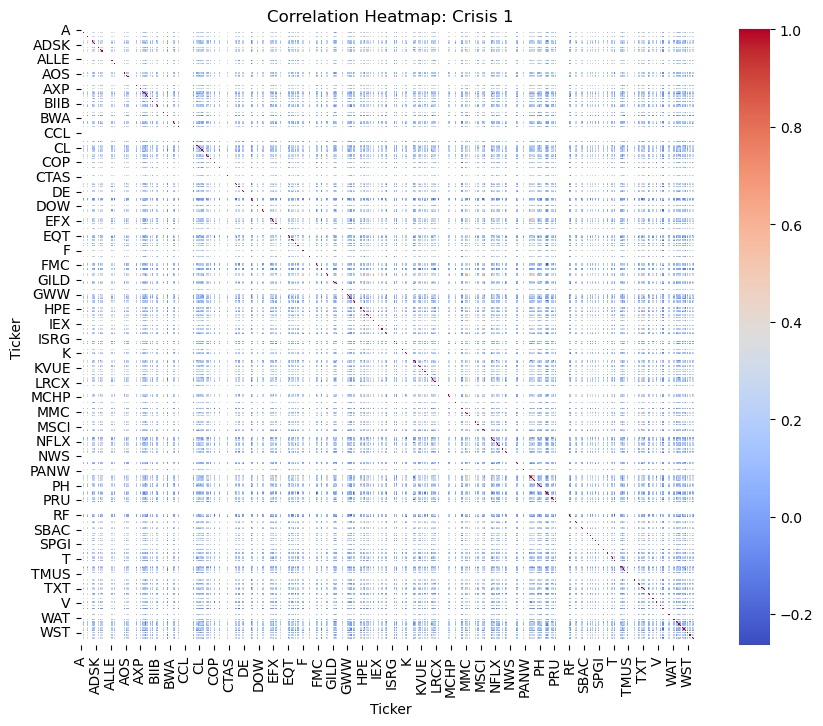

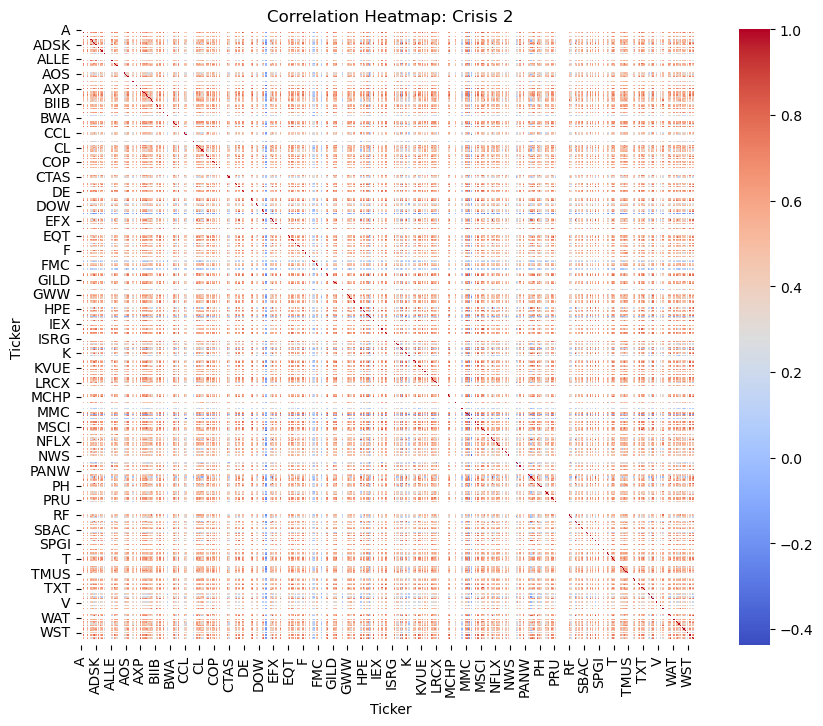

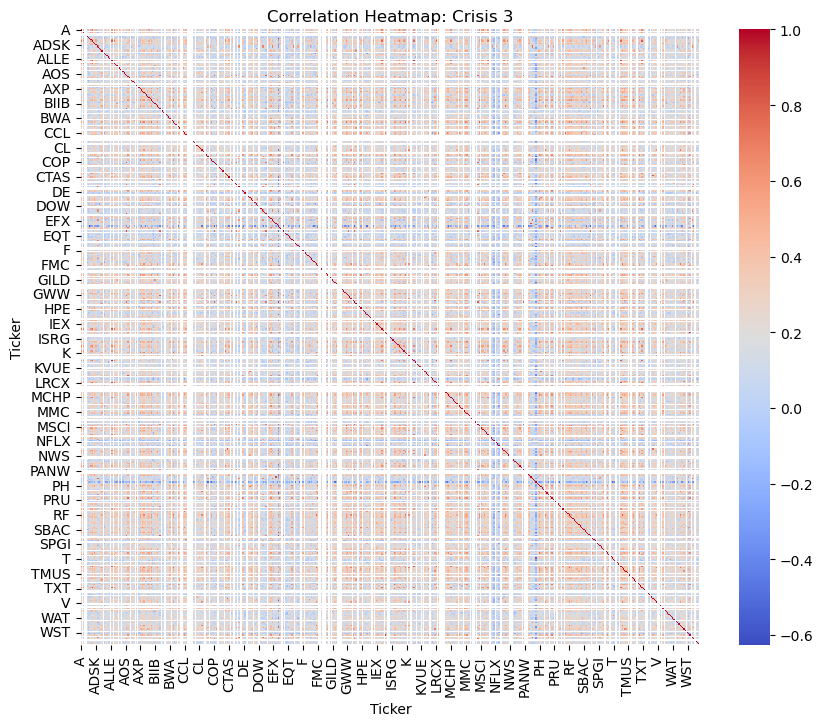

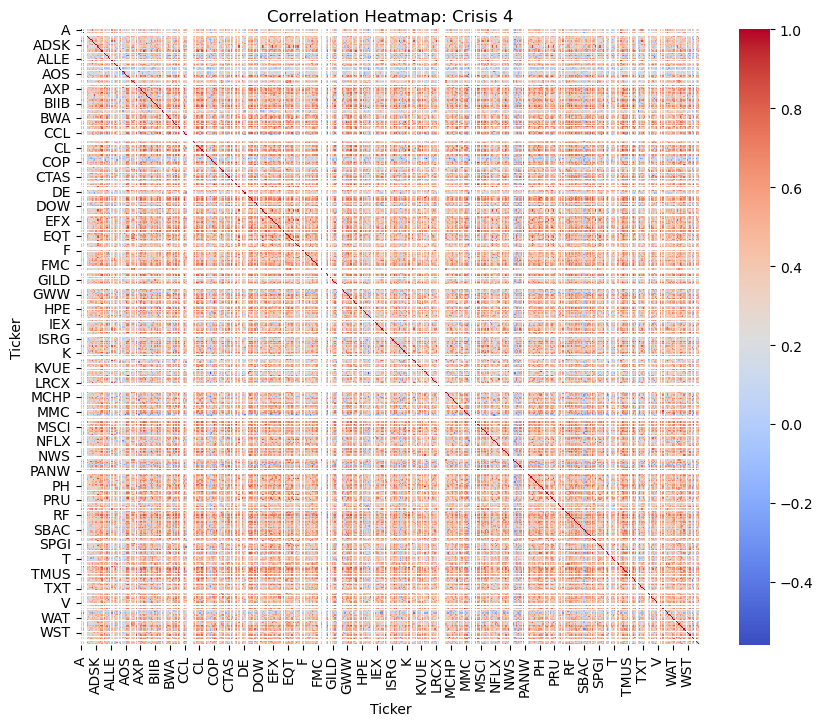

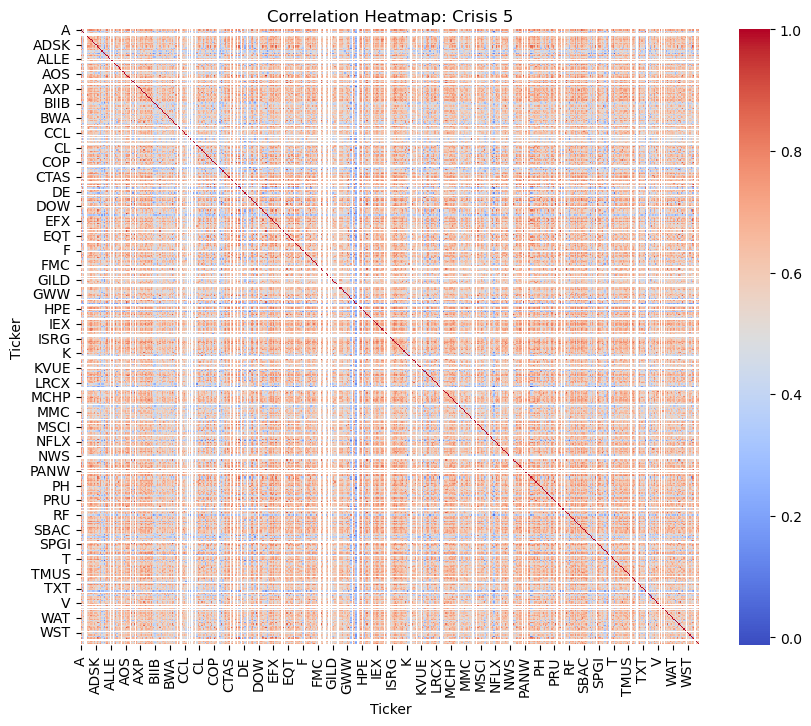

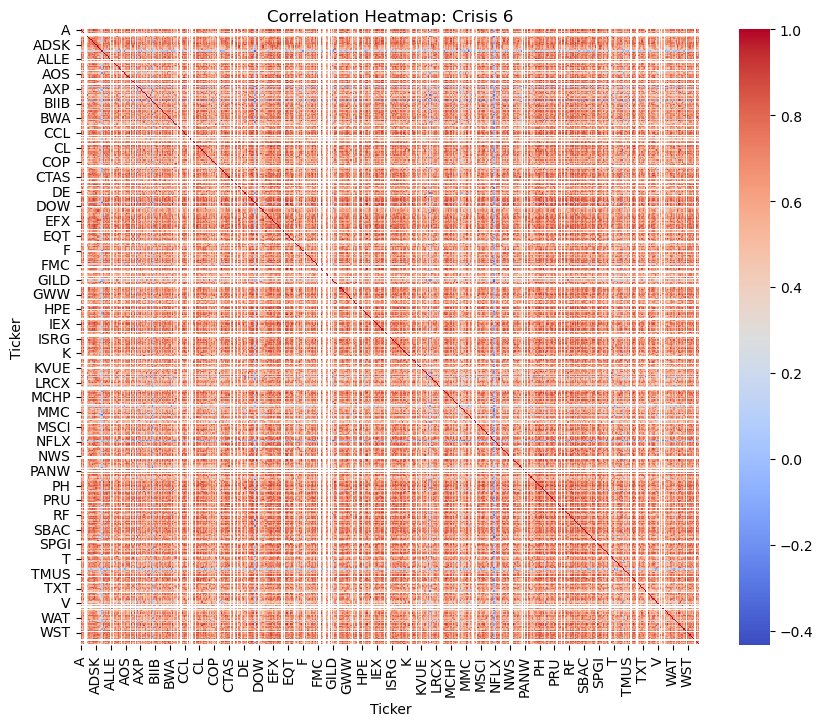

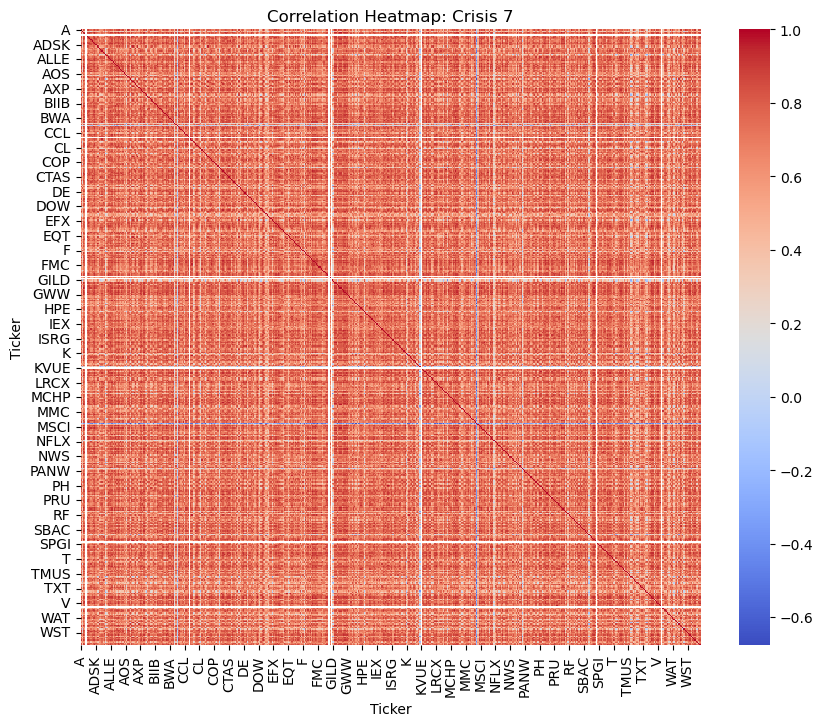

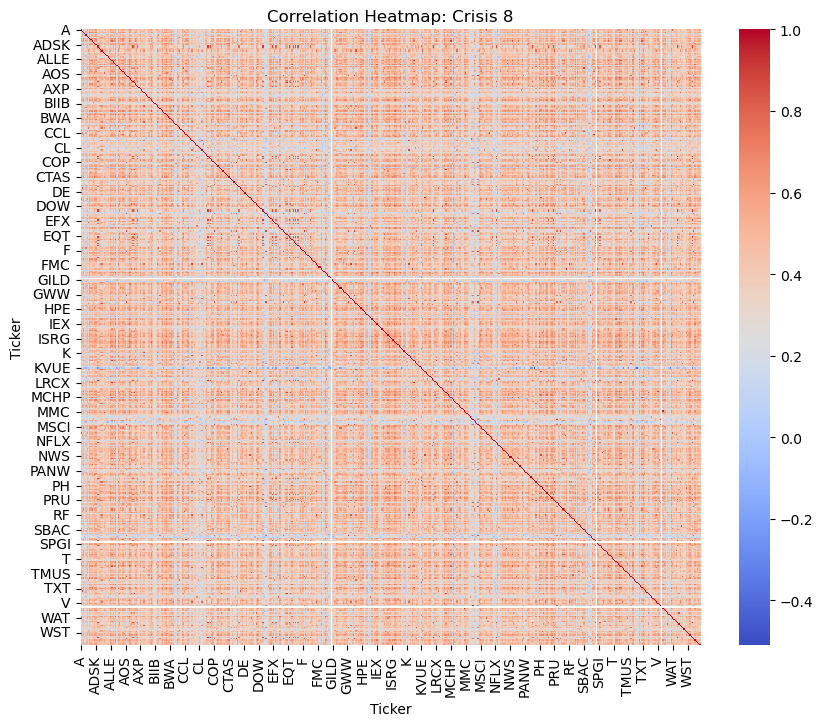

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


for crisis_label, correlation_matrix in all_correlations_crisis.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Heatmap: {crisis_label}')
    plt.show()


In [35]:
daily_returns = sp500['^GSPC'].pct_change()


In [36]:
monthly_variance = daily_returns.resample('M').var()
monthly_covariance = sp500.iloc[:,:-2].resample('M').apply(lambda x: x.cov(daily_returns))
average_monthly_beta = monthly_covariance.div(monthly_variance, axis=0).mean(axis=1)

C:\Users\vishw\anaconda3\Lib\site-packages\pandas\core\nanops.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
C:\Users\vishw\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [37]:
print(average_monthly_beta)

Date
1980-01-31    0.757792
1980-02-29    0.695805
1980-03-31    0.992285
1980-04-30    0.800342
1980-05-31    0.671330
                ...   
2023-08-31    0.789750
2023-09-30    0.879544
2023-10-31    0.929633
2023-11-30    1.163826
2023-12-31    1.185839
Freq: M, Length: 528, dtype: float64


In [38]:

average_monthly_beta_df = pd.DataFrame(list(average_monthly_beta.items()), columns=['Month', 'Average CAPM Beta'])

average_monthly_beta_df.head() 

Month  Average CAPM Beta
0 1980-01-31           0.757792
1 1980-02-29           0.695805
2 1980-03-31           0.992285
3 1980-04-30           0.800342
4 1980-05-31           0.671330

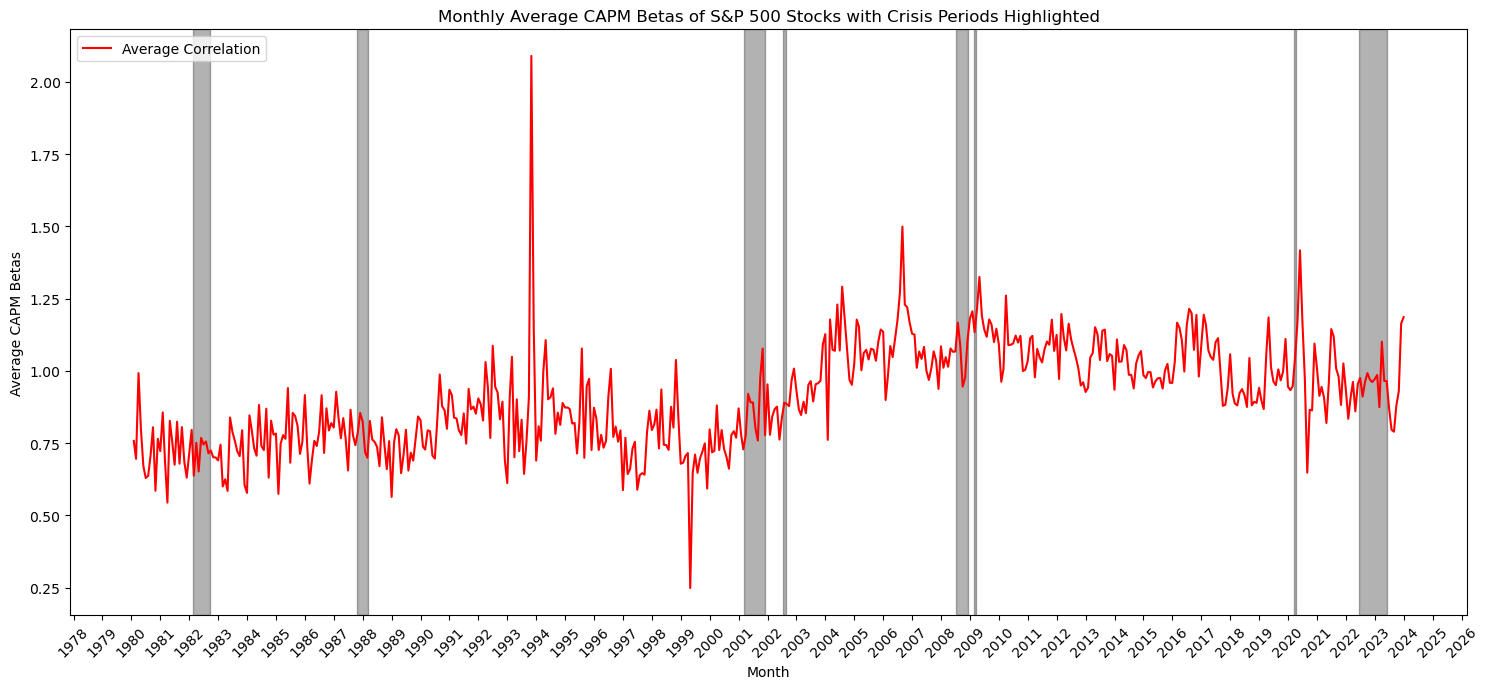

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

crisis_periods = [
    {'start': '1982-02-22', 'end': '1982-09-14'},
    {'start': '1987-10-19', 'end': '1988-03-08'},
    {'start': '2001-03-12', 'end': '2001-12-05'},
    {'start': '2002-07-10', 'end': '2002-08-22'},
    {'start': '2008-07-09', 'end': '2008-12-08'},
    {'start': '2009-02-23', 'end': '2009-03-23'},
    {'start': '2020-03-12', 'end': '2020-04-08'},
    {'start': '2022-06-13', 'end': '2023-06-08'}
]

average_monthly_beta_df['Month'] = pd.to_datetime(average_monthly_beta_df['Month'])

plt.figure(figsize=(15, 7))
plt.plot(average_monthly_beta_df['Month'], average_monthly_beta_df['Average CAPM Beta'], linestyle='-', color='red', label='Average Correlation')
for crisis in crisis_periods:
    start_date = mdates.date2num(pd.to_datetime(crisis['start']))
    end_date = mdates.date2num(pd.to_datetime(crisis['end']))
    plt.axvspan(start_date, end_date, color='black', alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()

plt.title('Monthly Average CAPM Betas of S&P 500 Stocks with Crisis Periods Highlighted')
plt.xlabel('Month')
plt.ylabel('Average CAPM Betas')
plt.tight_layout()
plt.show()

In this plot, the red line represents the average CAPM beta for each month, and the shaded gray areas indicate the crisis periods. A higher beta suggests that the stock is expected to have higher returns due to higher risk (compared to the market), while a lower beta indicates lower risk and potentially lower returns. From the plot, we can observe fluctuations in beta across different times. Notably, there may be spikes in beta during the crisis periods, indicating increased systematic risk and volatility in the market during these times.

During financial crises, investors can expect increased market volatility and systemic risk, which often result in higher beta values for stocks. This effect was particularly noticeable during the Global Financial Crisis of 2008 and is a typical pattern during such periods. The increased beta values imply that stocks are more sensitive to market movements and, therefore, riskier.

Understanding how beta values change during crises is essential for investors as it affects their investment decisions regarding risk and return. For instance, in a high-beta environment, investors might seek to adjust their portfolios by adding more stable, low-beta stocks or other assets to mitigate risk.

From a portfolio management perspective, highlighting crisis periods in beta analysis helps identify when the market's risk profile changes, necessitating adjustments in asset allocation to maintain desired risk levels. It also emphasizes the importance of dynamic risk assessment strategies, which can adapt to evolving market conditions.


The spike in the average CAPM beta values for S&P 500 stocks in 1993, as seen in the visualization you provided, may be associated with several economic and political events from that year. The European Exchange Rate Mechanism (ERM) crisis in 1992-1993, often known as the Black Wednesday, continued to impact markets into the following year. The crisis highlighted the difficulty of maintaining fixed exchange rates and led to heightened market volatility, which could have contributed to the increased beta values as investors reassessed the systemic risk in equity markets.

Additionally, 1993 was a year of notable political events with potential economic repercussions, such as the official creation of the European single market by the European Economic Community, which aimed to eliminate trade barriers within the EU. This could have influenced investor perception of market risk, thus impacting CAPM beta values. Significant global events, such as changes in interest rates by major banks like the Bank of England, could also have played a role in shifting market dynamics.

## Final Conclusion

The observed spikes in correlation approaching 1 during non-crisis periods suggest that high correlation between stocks is not exclusively a phenomenon of crisis periods. While it is true that during crises, correlations tend to increase — a concept known as "correlation breakdown," where diversified portfolios may converge to a correlation of 1 and thus move in tandem — this is not a rule that applies universally. Market dynamics are complex and influenced by a multitude of factors, including economic indicators, corporate earnings reports, regulatory changes, and investor sentiment, which can also lead to increased correlations outside of crises.

For example, a non-crisis event such as a major technological breakthrough in an influential sector or a regulatory change affecting a large segment of the market could result in increased stock correlations. Additionally, in a highly interconnected global economy, international events can affect markets worldwide, causing correlations to rise even during stable economic periods.


The spikes in average stock correlations observed in the image during non-crisis periods, approaching or reaching the level of 1, suggest that while crises often trigger a rise in correlations, they are not the sole cause of such phenomena. In fact, high correlation levels can also occur during non-crisis times due to various factors, including macroeconomic news, sectoral shocks, or systemic changes affecting multiple industries simultaneously.

During crises, the market tends to display what is known as "flight-to-quality" and "risk-off" behaviors, where investors move towards safer assets and away from riskier ones, leading to a more pronounced co-movement of stocks, sometimes causing correlations to approach 1. However, non-crisis periods can also experience periods of heightened correlation due to, for example, collective reactions to technological changes, regulatory reforms, or significant shifts in monetary policy. These events can affect investor sentiment and behaviors across the board, leading to similar buying or selling trends and hence higher correlations

The strong statistical evidence from the t-tests confirms that crises have a notable impact on market dynamics, causing stocks to move more in unison, which can erode the benefits of portfolio diversification.

The t-test results for average correlation and average CAPM Beta over various crises reveal a compelling narrative about the behavior of the S&P 500 during these tumultuous times.

For average correlation, the highly negative t-statistics during certain crises (Crisis 1 and Crisis 3, for example) with p-values at 0.0 indicate a statistically significant increase in stock correlation during these periods. In contrast, positive t-statistics (Crisis 2, 4, 5, 6, and 7) with p-values at 0.0 suggest instances where correlation might have been high but not necessarily as uniform across the board. This divergence in correlation behavior underscores the unique nature of each crisis — while all are periods of increased stress, the market's response in terms of stock correlations can vary widely, possibly reflecting the specific causes and conditions of each crisis.

The CAPM Beta results offer insights into market volatility and systematic risk. For most crises, positive t-statistics with extremely low p-values suggest that the market experienced higher volatility during these periods. Notably, Crisis 1, 2, 4, 6, and 7 showed significantly higher betas, indicating that stocks were more reactive to market swings and thus, carried higher risk. On the other hand, a negative t-statistic for Crisis 3, 5, and 8 with p-values indicating significance (except for Crisis 3 which was not significant) suggests periods where the systematic risk was different from the market, potentially less reactive to market swings.

The statistical evidence, underscored by the t-test results, affirms that during crisis periods, the average stock correlations within the S&P 500 show a marked tendency to increase, often approaching 1. This convergence toward 1 during crises illustrates the market phenomenon where individual securities' price movements become highly interdependent. In such scenarios, the typical benefits of diversification may be diminished, as stocks move more in lockstep in response to prevailing economic stressors, rather than according to individual company performance or sector-specific trends.